# Pre-Processing

In [64]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import cm
import seaborn as sns

from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
from sklearn.cluster import KMeans

from sklearn.metrics.pairwise import cosine_similarity
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, learning_curve

from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, LassoCV, LassoLarsCV
from sklearn import svm
from sklearn import linear_model

from sklearn.ensemble import RandomForestRegressor

import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, SimpleRNN, Dropout

/kaggle/input/full-canola-features/almost_final_final_df.csv


In [3]:
canola_feats = pd.read_csv('/kaggle/input/full-canola-features/almost_final_final_df.csv', index_col=0)
canola_features = canola_feats.drop(columns=['Region'])

In [4]:
canola_features.info() # Takeaways: 5973 values, no missing values, 27 columns (17 floats, 9 int, 1 obj), indexed by years (32y span)
canola_features.head()

<class 'pandas.core.frame.DataFrame'>
Index: 5973 entries, 1990 to 2022
Data columns (total 27 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Canola                      5973 non-null   float64
 1   region                      5973 non-null   int64  
 2   average_max_temp_in_4       5973 non-null   float64
 3   average_max_temp_in_5       5973 non-null   float64
 4   average_max_temp_in_6       5973 non-null   float64
 5   average_max_temp_in_7       5973 non-null   float64
 6   average_max_temp_in_8       5973 non-null   float64
 7   average_max_temp_in_9       5973 non-null   float64
 8   average_max_temp_in_10      5973 non-null   float64
 9   days_above_25               5973 non-null   int64  
 10  days_under_0                5973 non-null   int64  
 11  longest_dry_spell           5973 non-null   int64  
 12  longest_wet_spell           5973 non-null   int64  
 13  days_over_95_precipitation  5973 no

Canola  region  average_max_temp_in_4  average_max_temp_in_5  \
Year                                                                   
1990  0.127132       1             284.965759             290.526489   
1991  2.520378       1             287.648346             291.984650   
1992 -6.339489       1             283.242584             293.701874   
1993  4.147971       1             284.697113             292.762695   
1994  2.081733       1             285.144440             293.432678   

      average_max_temp_in_6  average_max_temp_in_7  average_max_temp_in_8  \
Year                                                                        
1990             297.082458             299.412781             300.752075   
1991             296.854401             297.652344             299.938751   
1992             295.445709             294.548126             297.033264   
1993             293.425385             294.037415             296.177429   
1994             294.774536             297.061951             297.072021   

      average_max_temp_in_9  average_max_temp_in_10  days_above_25  ...  \
Year                                                                ...   
1990             296.791382              286.036377             72  ...   
1991             292.543549              282.321960             51  ...   
1992             292.229004              285.503967             37  ...   
1993             291.031281              284.688232             26  ...   
1994             294.903839              286.052094             38  ...   

      SPI_in_5  SPI_in_6  SPI_in_7  SPI_in_8  SPI_in_9  SPI_in_10  Soil Zone  \
Year                                                                           
1990  0.029108  0.115236  0.209242  0.256968  0.171961  -0.032910          1   
1991  0.331767  0.195163  0.282696  0.222439  0.398697   0.232995          1   
1992  0.193160 -0.188189  0.358708  0.309846  0.225539  -0.114548          1   
1993 -0.052129  0.086120  0.608185  0.263007  0.235375  -0.044934          1   
1994  0.114090  0.446020  0.102491  0.320304  0.034789   0.322164          1   

       Latitude   Longitude  region_aggregate  
Year                                           
1990  49.154052 -101.479393      Southeastern  
1991  49.154052 -101.479393      Southeastern  
1992  49.154052 -101.479393      Southeastern  
1993  49.154052 -101.479393      Southeastern  
1994  49.154052 -101.479393      Southeastern  

[5 rows x 27 columns]

### Target Variable Analysis

/tmp/ipykernel_35/2857319425.py:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.kdeplot(x='Canola', data=canola_features, fill=True, palette='viridis')
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


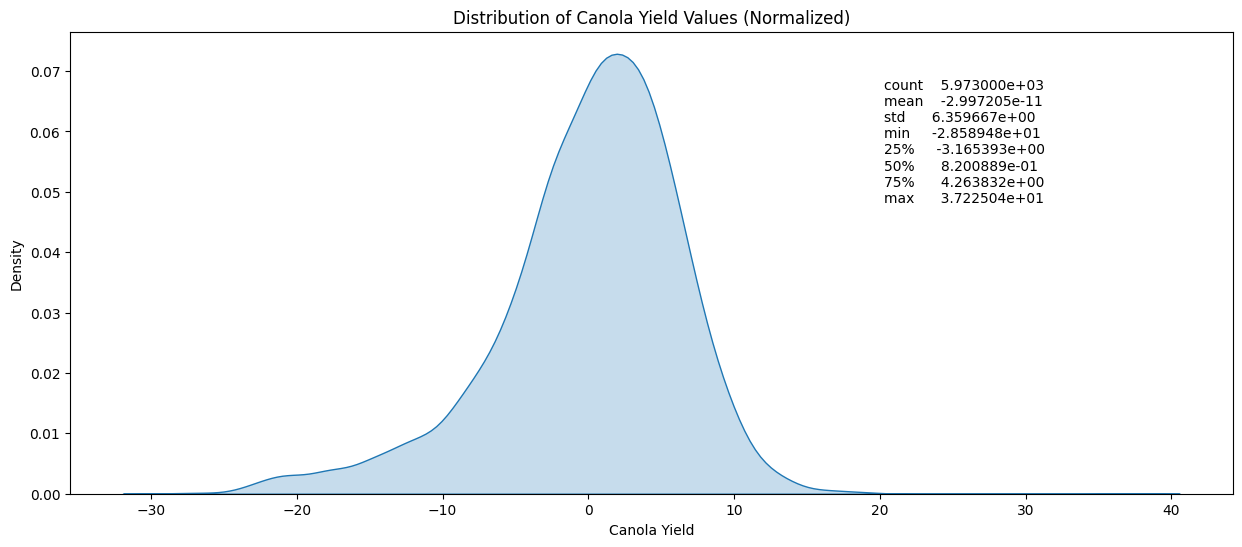

In [5]:
plt.figure(figsize=(15, 6))
sns.kdeplot(x='Canola', data=canola_features, fill=True, palette='viridis')

plt.text(0.7, 0.9, canola_features['Canola'].describe().to_string(), transform=plt.gca().transAxes, fontsize=10, verticalalignment='top')

plt.xlabel('Canola Yield')
plt.ylabel('Density')
plt.title('Distribution of Canola Yield Values (Normalized)')

plt.show()

### Feature Exploration

#### SPI Values

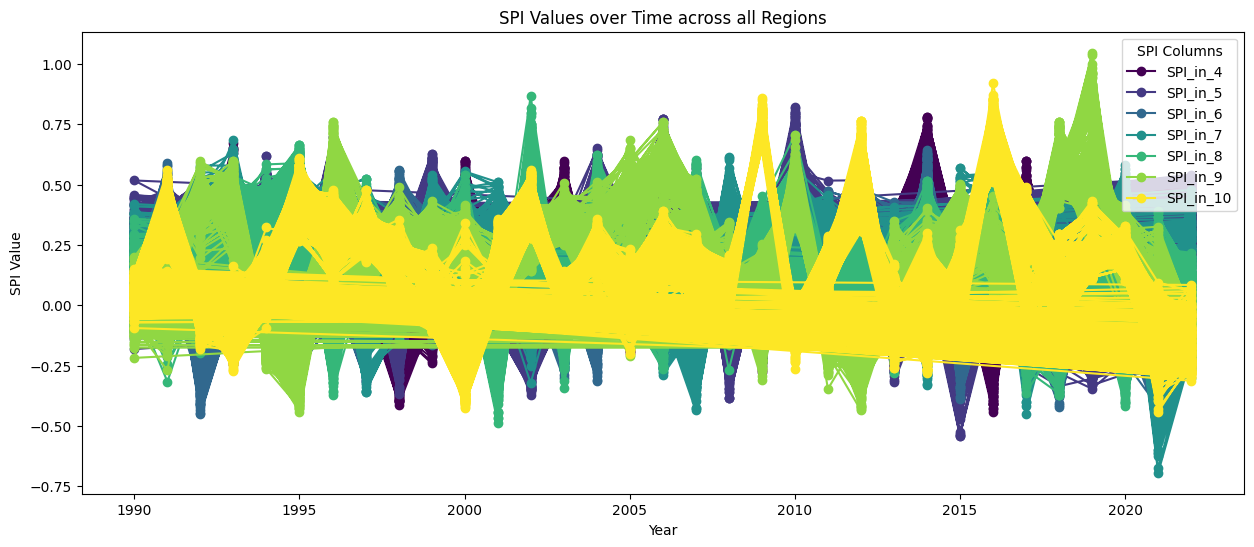

In [6]:
# Select only the 'SPI_in_x' columns
spi_columns = canola_features.filter(like='SPI_in')

# Plot each column
spi_columns.plot(figsize=(15, 6), marker='o', colormap='viridis')

# Set labels and title
plt.xlabel('Year')
plt.ylabel('SPI Value')
plt.title('SPI Values over Time across all Regions')

# Show the legend
plt.legend(title='SPI Columns')

# Show the plot
plt.show()

#### Average Maximum Monthly Temperatures

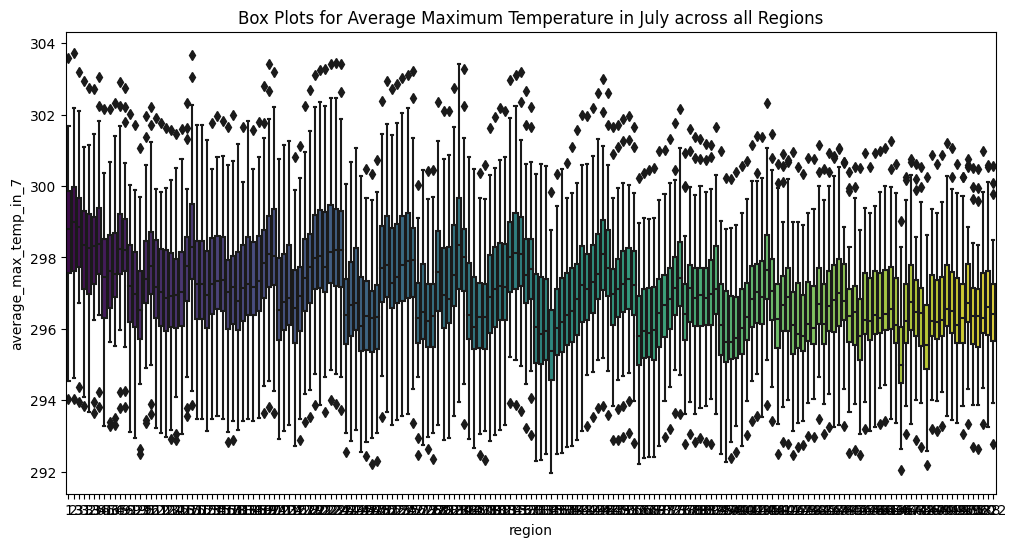

In [7]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='region', y='average_max_temp_in_7', data=canola_features, palette='viridis')
plt.title('Box Plots for Average Maximum Temperature in July across all Regions')
plt.show()

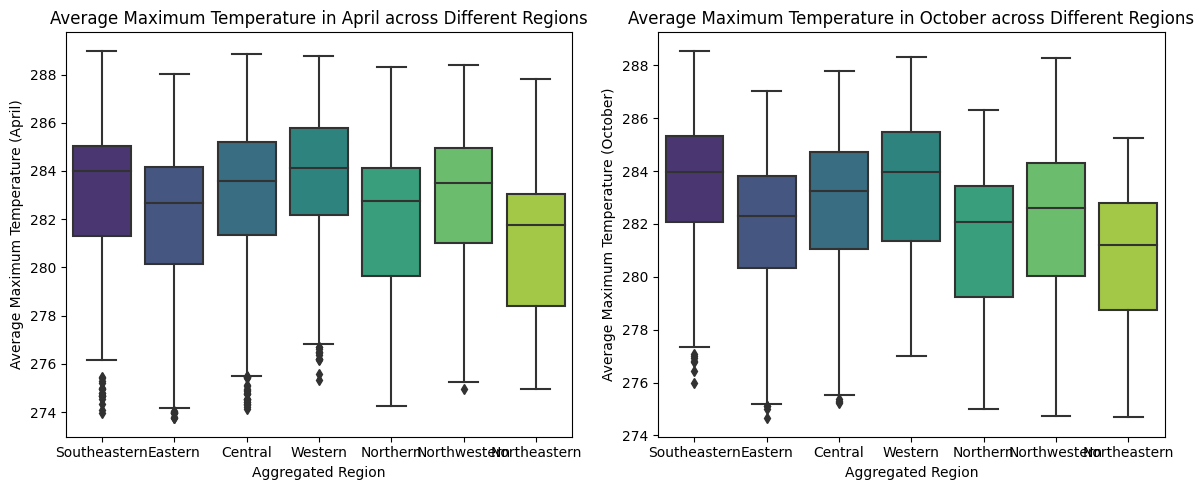

In [8]:
# Box Plots for Temperature Variables across Different Regions
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.boxplot(x='region_aggregate', y='average_max_temp_in_4', data=canola_features, palette='viridis')
plt.xlabel('Aggregated Region')
plt.ylabel('Average Maximum Temperature (April)')
plt.title('Average Maximum Temperature in April across Different Regions')

plt.subplot(1, 2, 2)
sns.boxplot(x='region_aggregate', y='average_max_temp_in_10', data=canola_features, palette='viridis')
plt.xlabel('Aggregated Region')
plt.ylabel('Average Maximum Temperature (October)')
plt.title('Average Maximum Temperature in October across Different Regions')

plt.tight_layout()
plt.show()
# plt.savefig('temps_by_region.png')

#### Heat and Frost Days

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

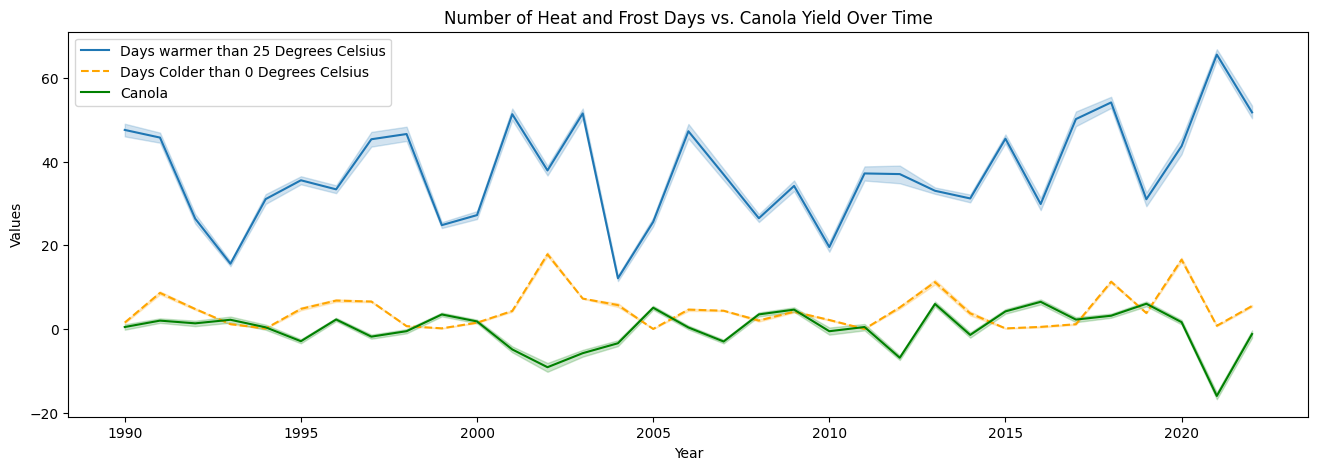

In [9]:
# Line Plot for Days Above 25 Degrees over Time
plt.figure(figsize=(16, 5))
sns.lineplot(x='Year', y='days_above_25', data=canola_features.reset_index(), label='Days warmer than 25 Degrees Celsius')
sns.lineplot(x='Year', y='days_under_0', data=canola_features.reset_index(), label='Days Colder than 0 Degrees Celsius', linestyle='--', color='orange')
sns.lineplot(x='Year', y='Canola', data=canola_features.reset_index(), label='Canola', linestyle='-', color='green')
plt.xlabel('Year')
plt.ylabel('Values')
plt.title('Number of Heat and Frost Days vs. Canola Yield Over Time')
plt.legend()
plt.show()

#### Soil Zone

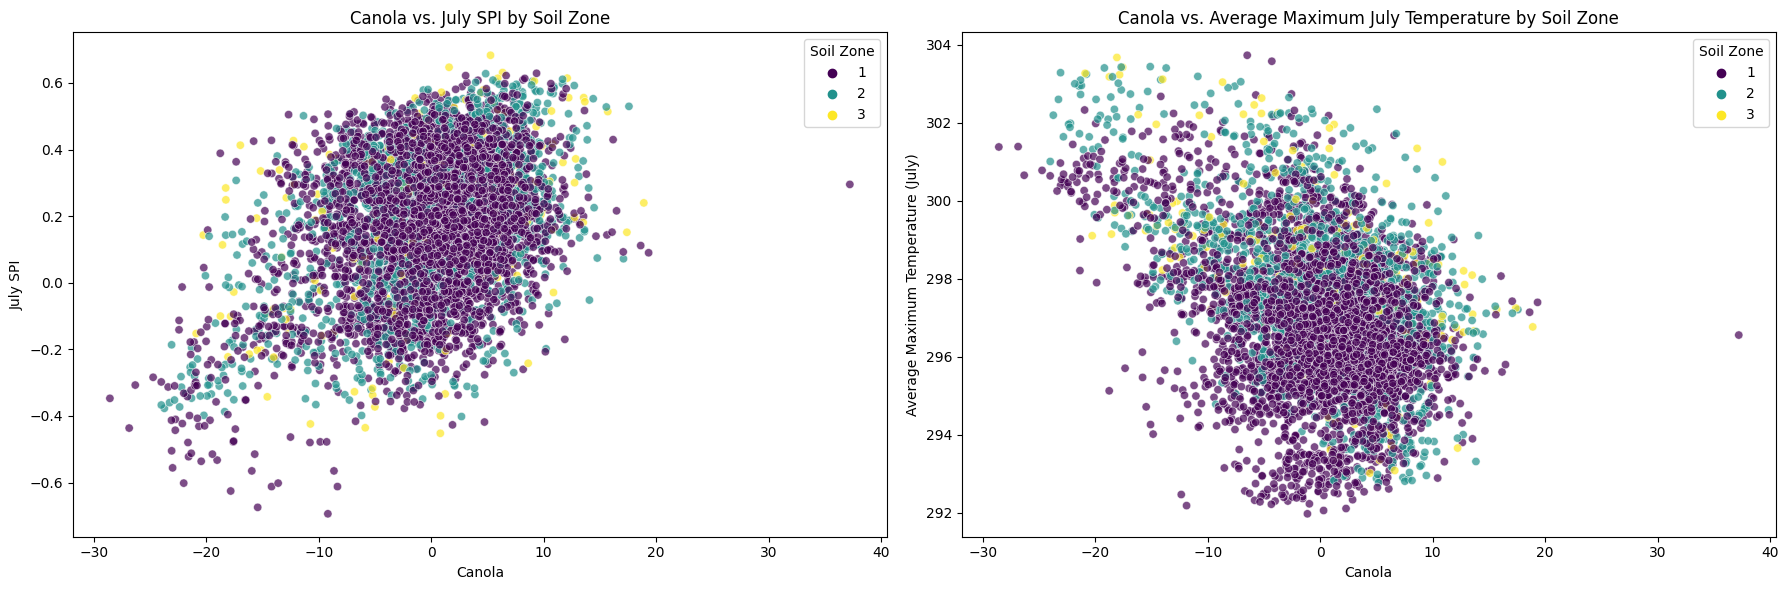

In [10]:
# Scatter Plots for Canola vs. July Temperature Events by Soil Zone

fig, axs = plt.subplots(1, 2, figsize=(18, 6))

sns.scatterplot(x='Canola', y='SPI_in_7', hue='Soil Zone', data=canola_features, palette='viridis', alpha=0.7, ax=axs[0])
axs[0].set_xlabel('Canola')
axs[0].set_ylabel('July SPI')
axs[0].set_title('Canola vs. July SPI by Soil Zone')
axs[0].legend(title='Soil Zone')

sns.scatterplot(x='Canola', y='average_max_temp_in_7', hue='Soil Zone', data=canola_features, palette='viridis', alpha=0.7, ax=axs[1])
axs[1].set_xlabel('Canola')
axs[1].set_ylabel('Average Maximum Temperature (July)')
axs[1].set_title('Canola vs. Average Maximum July Temperature by Soil Zone')
axs[1].legend(title='Soil Zone')

plt.tight_layout()
plt.show()

In [11]:
# outlier visible above

outlier_row = canola_features[canola_features['Canola'] > 30]
outlier_row

Canola  region  average_max_temp_in_4  average_max_temp_in_5  \
Year                                                                    
1994  37.225038     499             285.575378             291.458435   

      average_max_temp_in_6  average_max_temp_in_7  average_max_temp_in_8  \
Year                                                                        
1994             293.444427             296.556519             296.003845   

      average_max_temp_in_9  average_max_temp_in_10  days_above_25  ...  \
Year                                                                ...   
1994             295.027527              283.726349             35  ...   

      SPI_in_5  SPI_in_6  SPI_in_7  SPI_in_8  SPI_in_9  SPI_in_10  Soil Zone  \
Year                                                                           
1994  0.432179  0.331947  0.295442  0.267108 -0.066986   0.003434          1   

       Latitude   Longitude  region_aggregate  
Year                                           
1994  53.507469 -108.820647      Northwestern  

[1 rows x 27 columns]

In [12]:
canola_features_no_outlier = canola_features[canola_features['Canola'] <= 30]

#### Soil Zone

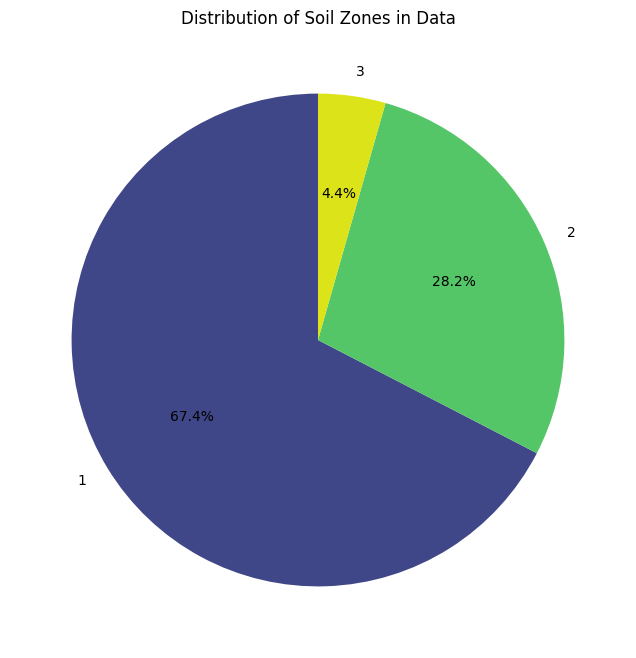

In [13]:
soil_zone_counts = canola_features_no_outlier['Soil Zone'].value_counts()

colors = ['#404788FF', '#55C667FF', '#DCE319FF']

plt.figure(figsize=(8, 8))
plt.pie(soil_zone_counts, labels=soil_zone_counts.index, colors=colors, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Soil Zones in Data')
plt.show()

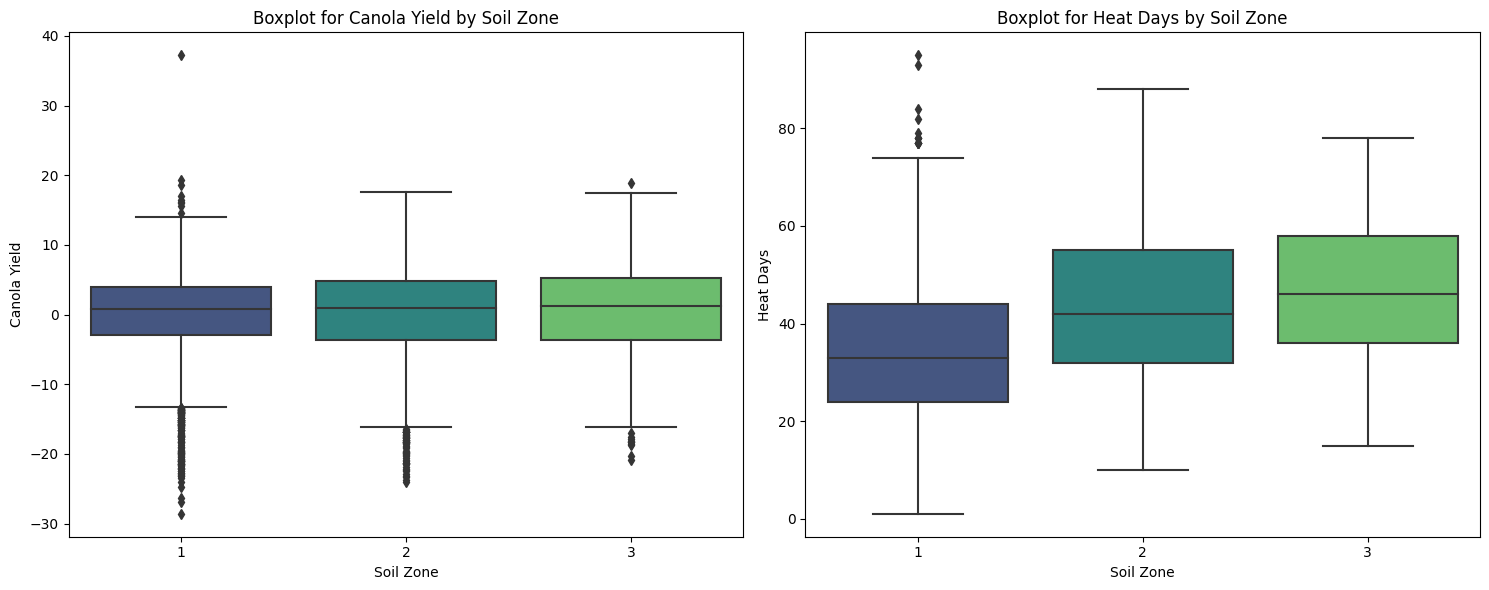

In [14]:
fig, axs = plt.subplots(1, 2, figsize=(15, 6))

sns.boxplot(x='Soil Zone', y='Canola', data=canola_features_no_outlier, palette='viridis', ax=axs[0])
axs[0].set_xlabel('Soil Zone')
axs[0].set_ylabel('Canola Yield')
axs[0].set_title('Boxplot for Canola Yield by Soil Zone')

sns.boxplot(x='Soil Zone', y='days_above_25', data=canola_features_no_outlier.reset_index(), palette='viridis', ax=axs[1])
axs[1].set_xlabel('Soil Zone')
axs[1].set_ylabel('Heat Days')
axs[1].set_title('Boxplot for Heat Days by Soil Zone')

plt.tight_layout()
plt.show()

#### Latitude and Longitude

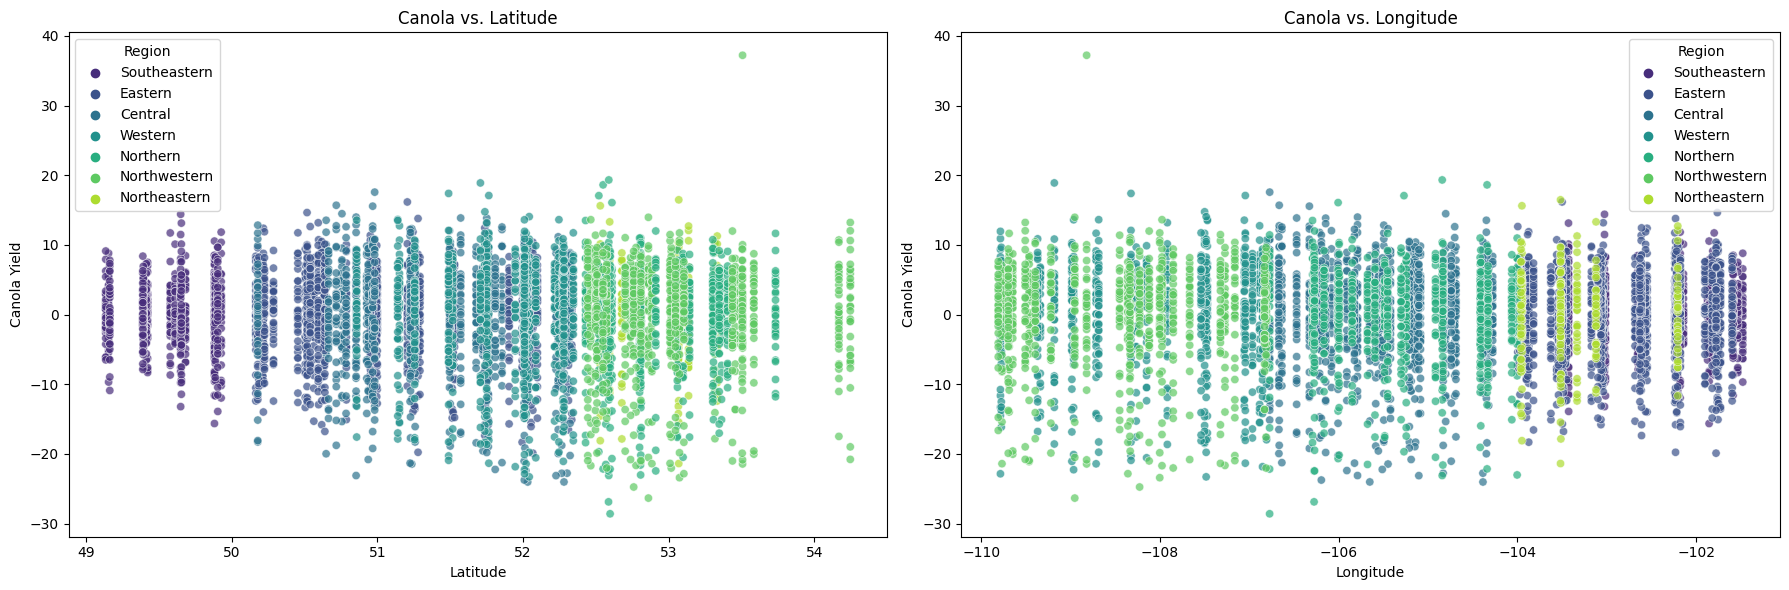

In [15]:
fig, axs = plt.subplots(1, 2, figsize=(18, 6))

sns.scatterplot(y='Canola', x='Latitude', hue='region_aggregate', data=canola_features_no_outlier, palette='viridis', alpha=0.7, ax=axs[0])
axs[0].set_ylabel('Canola Yield')
axs[0].set_xlabel('Latitude')
axs[0].set_title('Canola vs. Latitude')
axs[0].legend(title='Region')

sns.scatterplot(y='Canola', x='Longitude', hue='region_aggregate', data=canola_features_no_outlier, palette='viridis', alpha=0.7, ax=axs[1])
axs[1].set_ylabel('Canola Yield')
axs[1].set_xlabel('Longitude')
axs[1].set_title('Canola vs. Longitude')
axs[1].legend(title='Region')

plt.tight_layout()
plt.show()

#### Dry and Wet Spells

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

<Figure size 640x480 with 0 Axes>

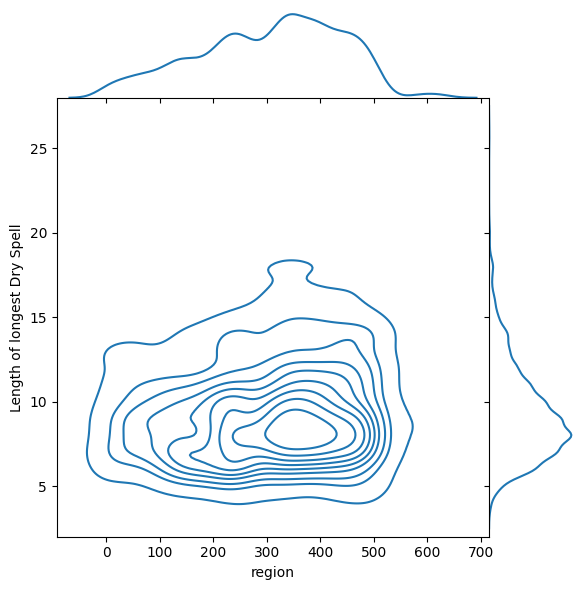

In [16]:
fig = plt.figure()
sns.jointplot(x='region', y='longest_dry_spell', data=canola_features_no_outlier.reset_index(), kind="kde", space=0)
plt.ylabel('Length of longest Dry Spell')
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

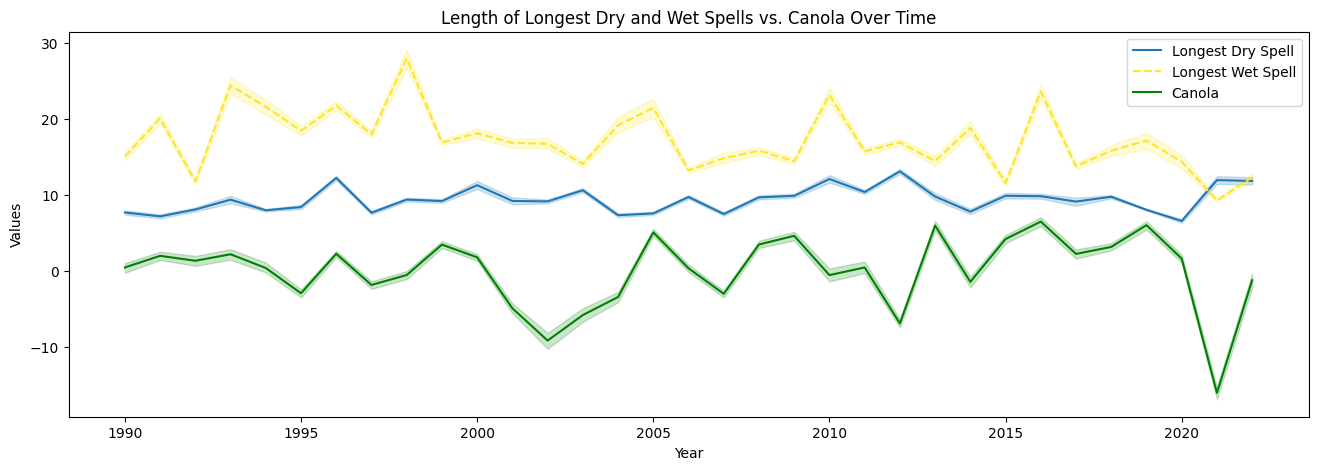

In [17]:
plt.figure(figsize=(16, 5))
sns.lineplot(x='Year', y='longest_dry_spell', data=canola_features_no_outlier.reset_index(), label='Longest Dry Spell')
sns.lineplot(x='Year', y='longest_wet_spell', data=canola_features_no_outlier.reset_index(), label='Longest Wet Spell', linestyle='--', color='#FDE725FF')
sns.lineplot(x='Year', y='Canola', data=canola_features_no_outlier.reset_index(), label='Canola', linestyle='-', color='green')
plt.xlabel('Year')
plt.ylabel('Values')
plt.title('Length of Longest Dry and Wet Spells vs. Canola Over Time')
plt.legend()
plt.show()

## Correlation Analysis

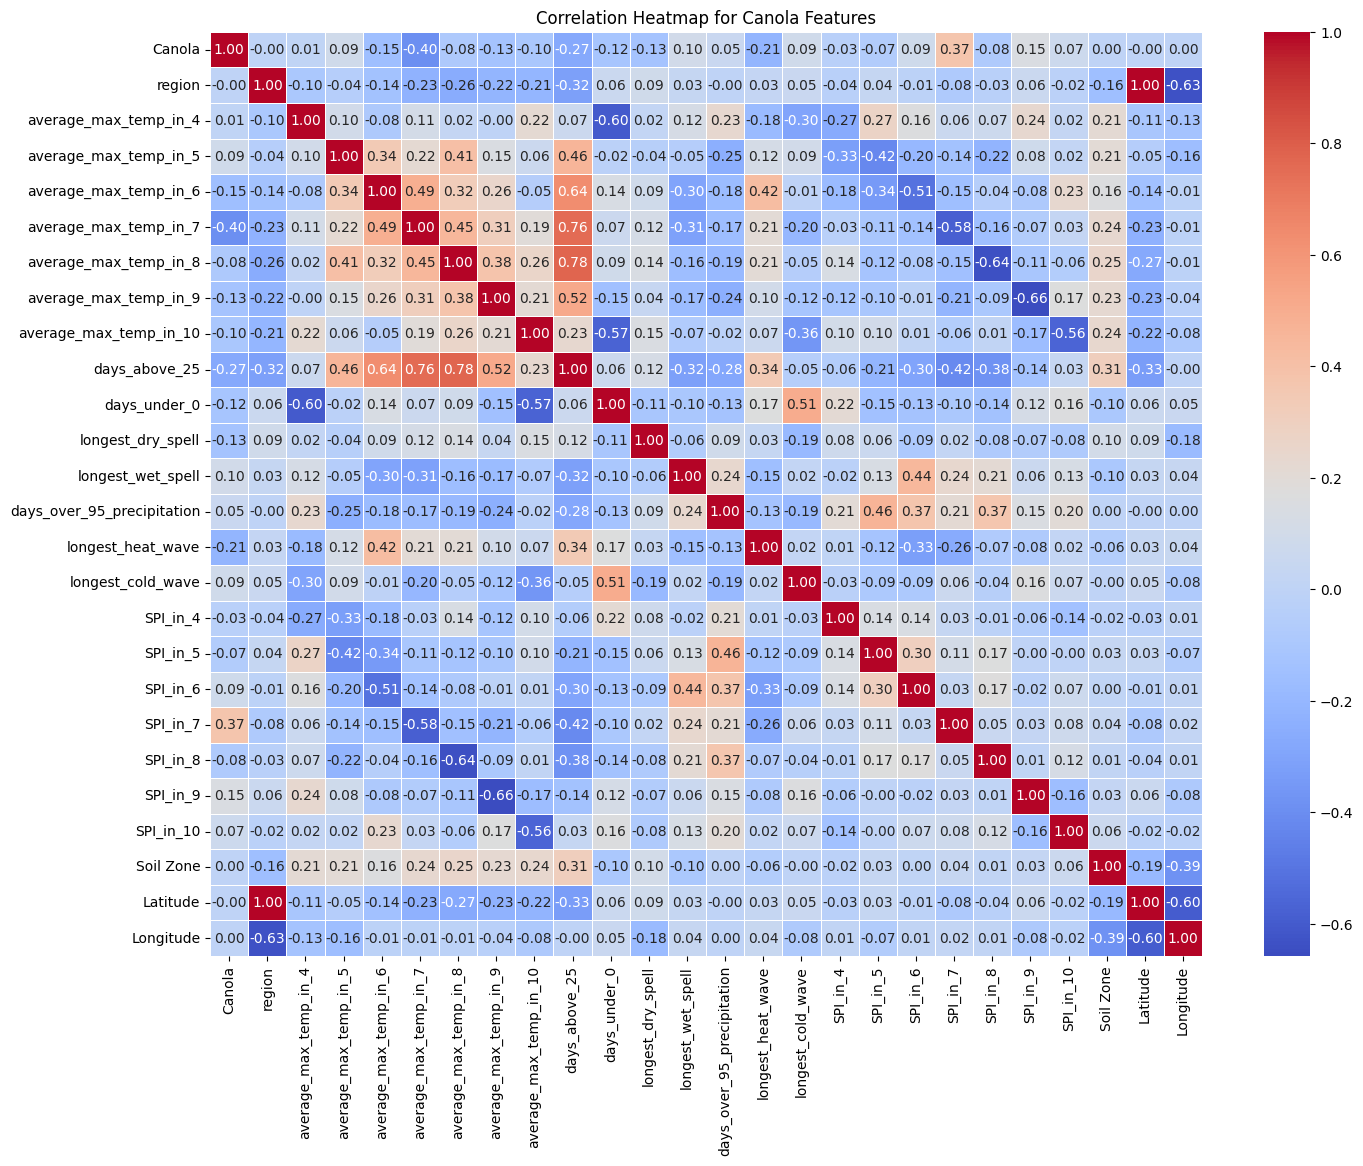

In [18]:
canola_subset = canola_features_no_outlier.drop('region_aggregate', axis=1)
plt.figure(figsize=(16, 12))
correlation_matrix = canola_subset.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap for Canola Features')
plt.show()

In [19]:
# TAKEAWAYS: region explained by lat and lon, avg_max_temp_8 explained by 7 and days >25 + no importance in LASSO, avg_max_temp_10 explained by days <0 and low importance in LASSO, wet days explained by SPIs and no importance in LASSO
canola_subsubset = canola_subset.drop(columns=['region', 'average_max_temp_in_6','average_max_temp_in_8', 'average_max_temp_in_10', 'days_over_95_precipitation'])

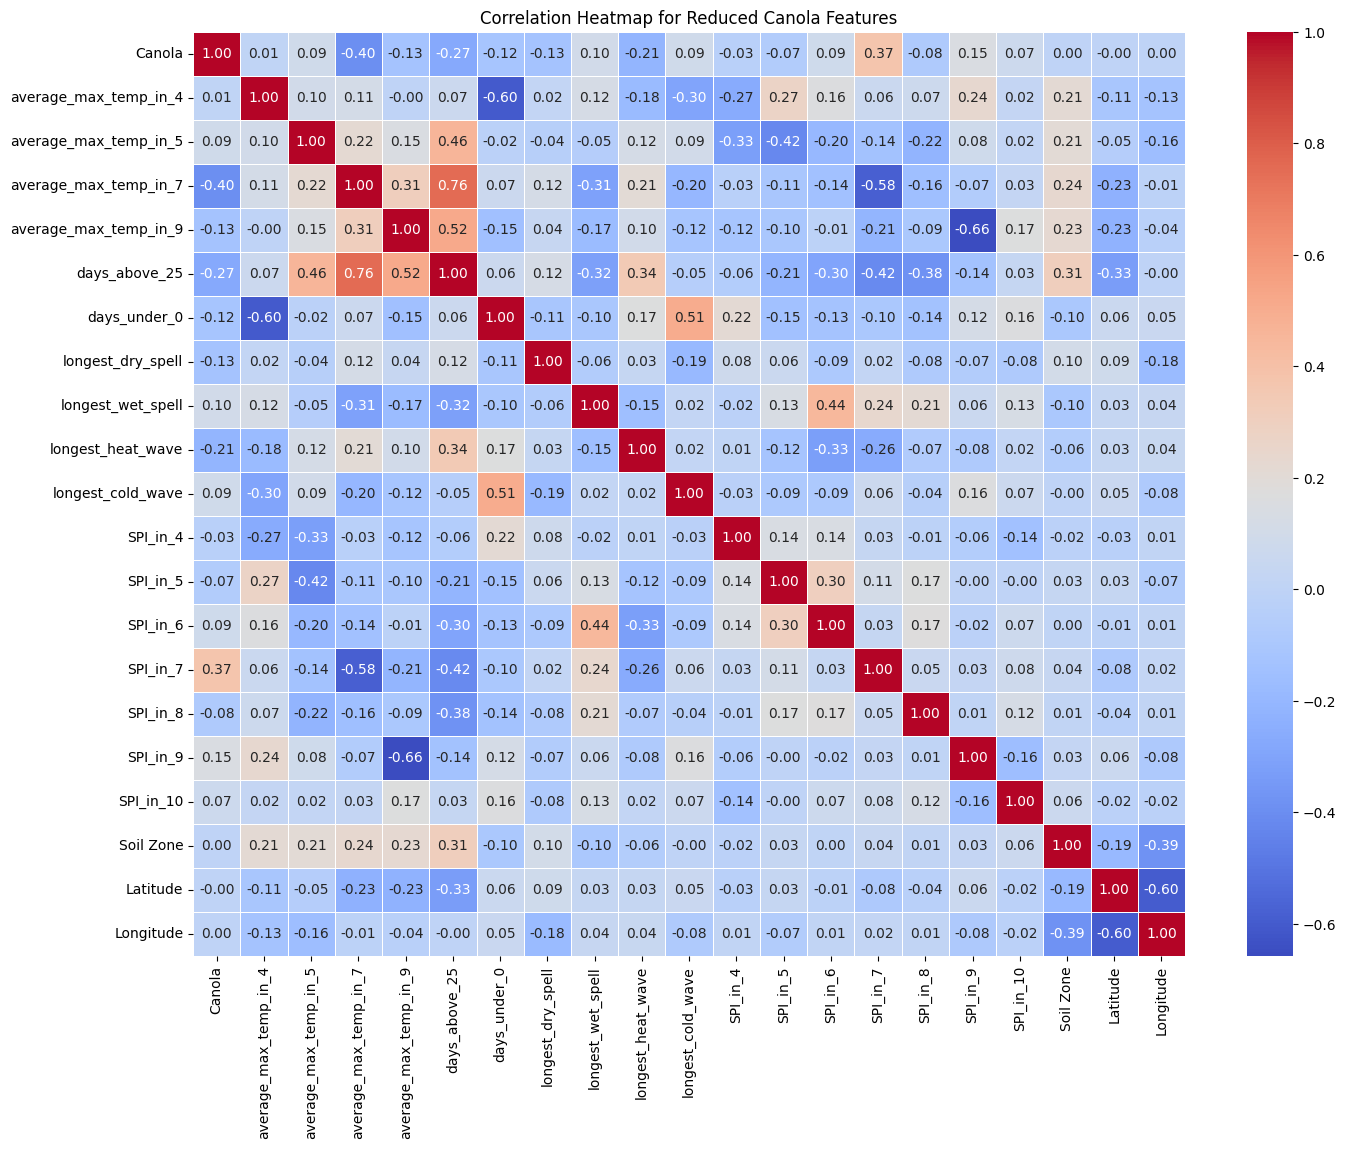

In [20]:
plt.figure(figsize=(16, 12))
correlation_matrix_2 = canola_subsubset.corr()
sns.heatmap(correlation_matrix_2, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap for Reduced Canola Features')
plt.show()
# avg_max_temp_in_7 is critical but important in domain context and also in LASSO

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3

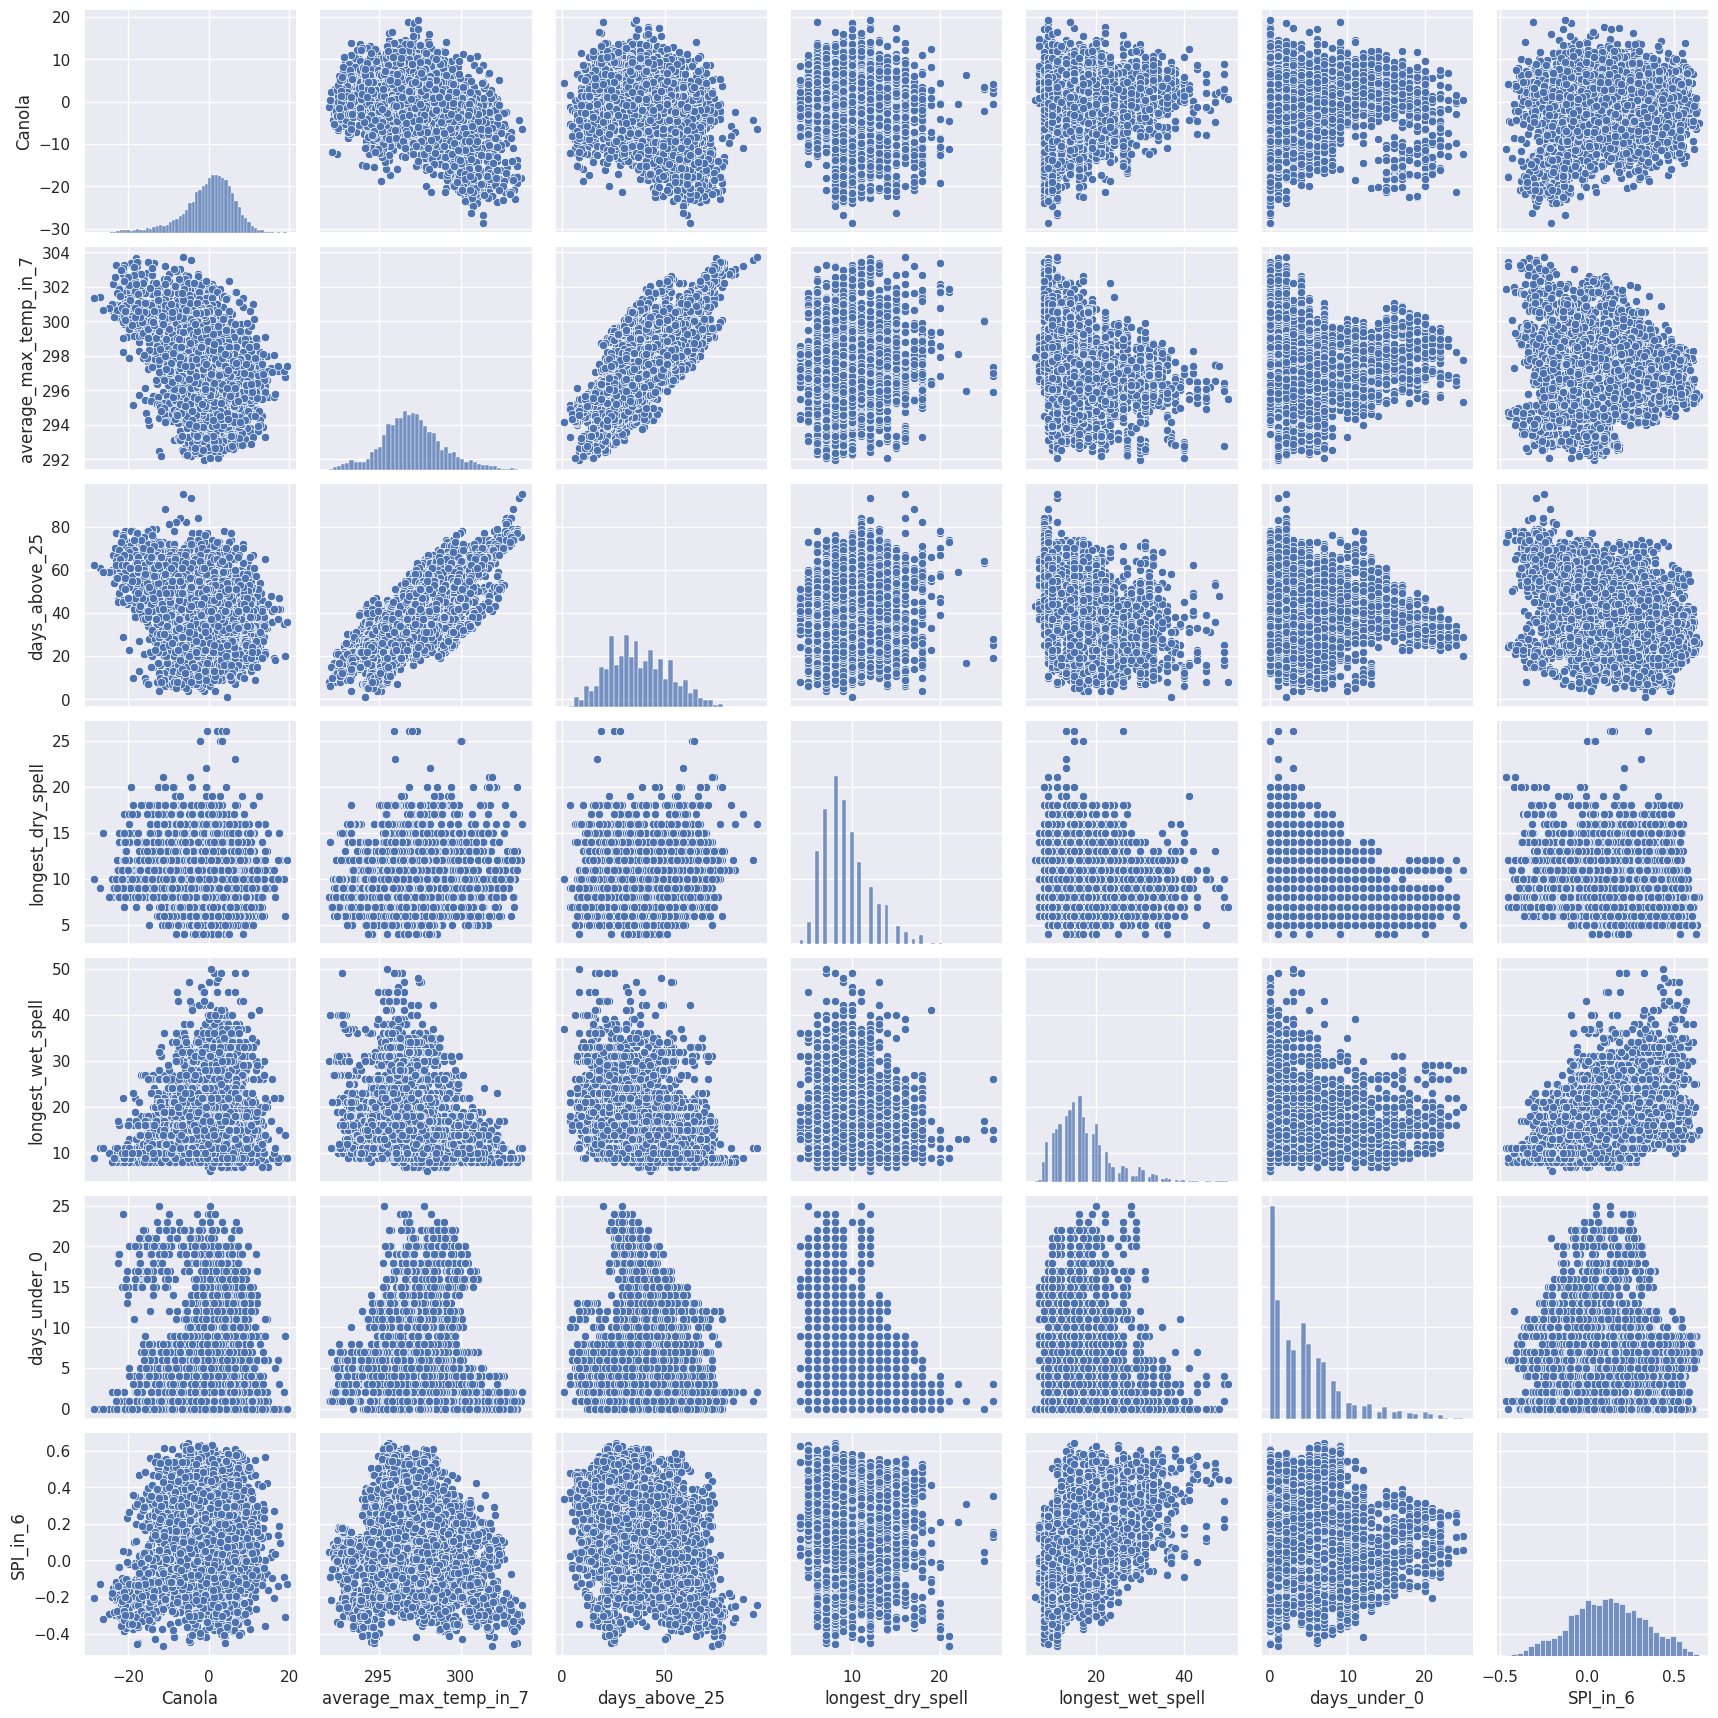

In [21]:
sns.set()
cols = ['Canola', 'average_max_temp_in_7', 'days_above_25', 'longest_dry_spell','longest_wet_spell', 'days_under_0','SPI_in_6']
sns.pairplot(canola_subsubset[cols], size = 2.5)
plt.show()

## Clustering (K-Means)

In [22]:
X = scale.fit_transform(canola_subsubset.reset_index().dropna())

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:8

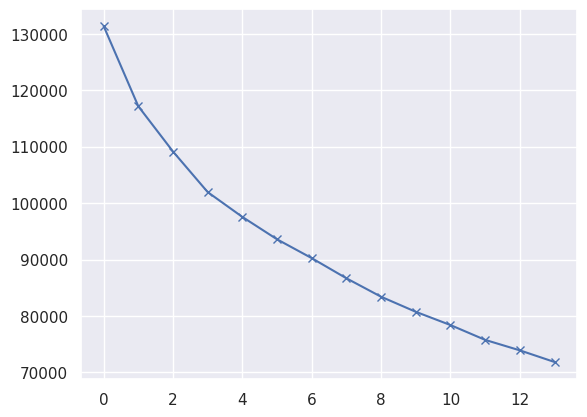

In [23]:
n_clusters=15
cost=[]
for i in range(1,n_clusters):
    kmean= KMeans(i)
    kmean.fit(X)
    cost.append(kmean.inertia_)  
plt.plot(cost, 'bx-', )

In [24]:
kmean= KMeans(5)
kmean.fit(X)
labels=kmean.labels_
clusters=pd.concat([canola_subsubset.reset_index().dropna(), pd.DataFrame({'cluster':labels})], axis=1)
clusters.head()

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Year    Canola  region  average_max_temp_in_4  average_max_temp_in_5  \
0  1990  0.127132       1             284.965759             290.526489   
1  1991  2.520378       1             287.648346             291.984650   
2  1992 -6.339489       1             283.242584             293.701874   
3  1993  4.147971       1             284.697113             292.762695   
4  1994  2.081733       1             285.144440             293.432678   

   average_max_temp_in_6  average_max_temp_in_7  average_max_temp_in_8  \
0             297.082458             299.412781             300.752075   
1             296.854401             297.652344             299.938751   
2             295.445709             294.548126             297.033264   
3             293.425385             294.037415             296.177429   
4             294.774536             297.061951             297.072021   

   average_max_temp_in_9  average_max_temp_in_10  ...  SPI_in_5  SPI_in_6  \
0             296.791382              286.036377  ...  0.029108  0.115236   
1             292.543549              282.321960  ...  0.331767  0.195163   
2             292.229004              285.503967  ...  0.193160 -0.188189   
3             291.031281              284.688232  ... -0.052129  0.086120   
4             294.903839              286.052094  ...  0.114090  0.446020   

   SPI_in_7  SPI_in_8  SPI_in_9  SPI_in_10  Soil Zone   Latitude   Longitude  \
0  0.209242  0.256968  0.171961  -0.032910          1  49.154052 -101.479393   
1  0.282696  0.222439  0.398697   0.232995          1  49.154052 -101.479393   
2  0.358708  0.309846  0.225539  -0.114548          1  49.154052 -101.479393   
3  0.608185  0.263007  0.235375  -0.044934          1  49.154052 -101.479393   
4  0.102491  0.320304  0.034789   0.322164          1  49.154052 -101.479393   

   cluster  
0        2  
1        1  
2        3  
3        0  
4        1  

[5 rows x 28 columns]

In [25]:
clusters.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5972 entries, 0 to 5971
Data columns (total 28 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Year                        5972 non-null   int64  
 1   Canola                      5972 non-null   float64
 2   region                      5972 non-null   int64  
 3   average_max_temp_in_4       5972 non-null   float64
 4   average_max_temp_in_5       5972 non-null   float64
 5   average_max_temp_in_6       5972 non-null   float64
 6   average_max_temp_in_7       5972 non-null   float64
 7   average_max_temp_in_8       5972 non-null   float64
 8   average_max_temp_in_9       5972 non-null   float64
 9   average_max_temp_in_10      5972 non-null   float64
 10  days_above_25               5972 non-null   int64  
 11  days_under_0                5972 non-null   int64  
 12  longest_dry_spell           5972 non-null   int64  
 13  longest_wet_spell           5972 

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:447: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = plt.figure(figsize=figsize)


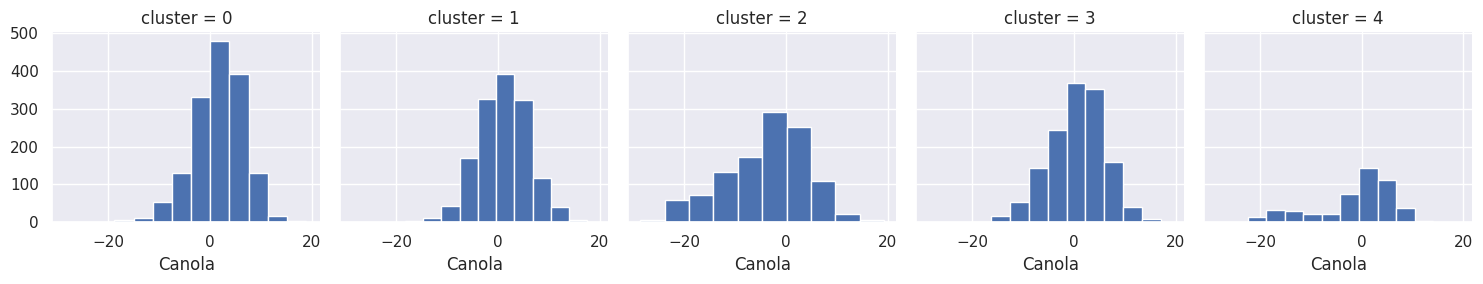

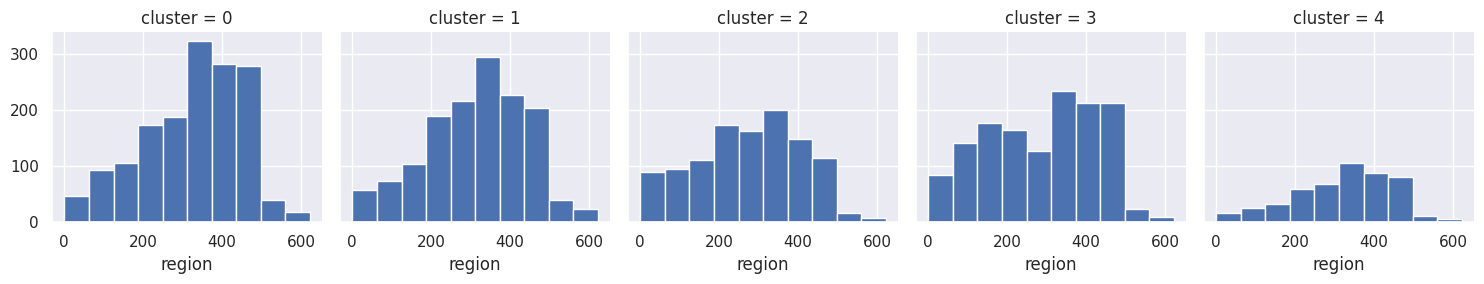

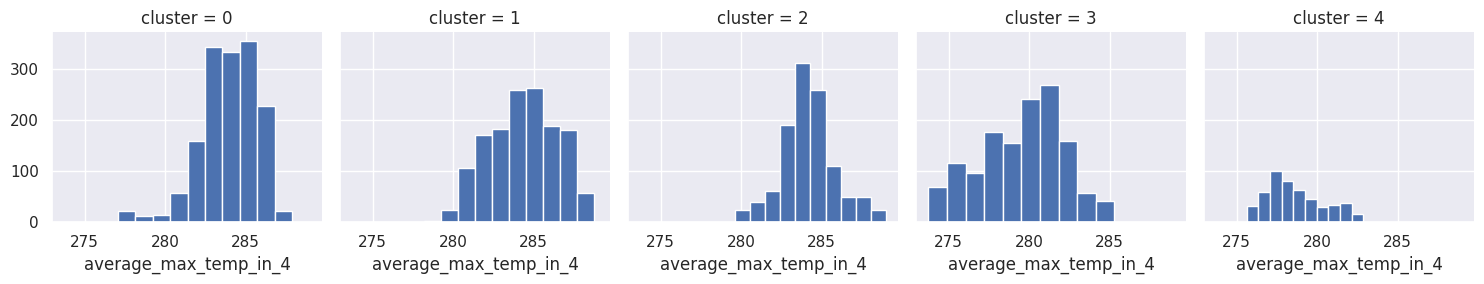

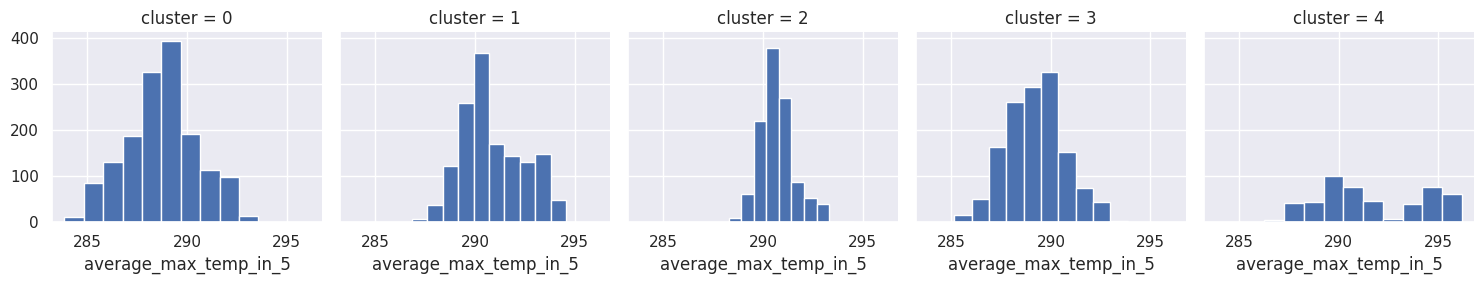

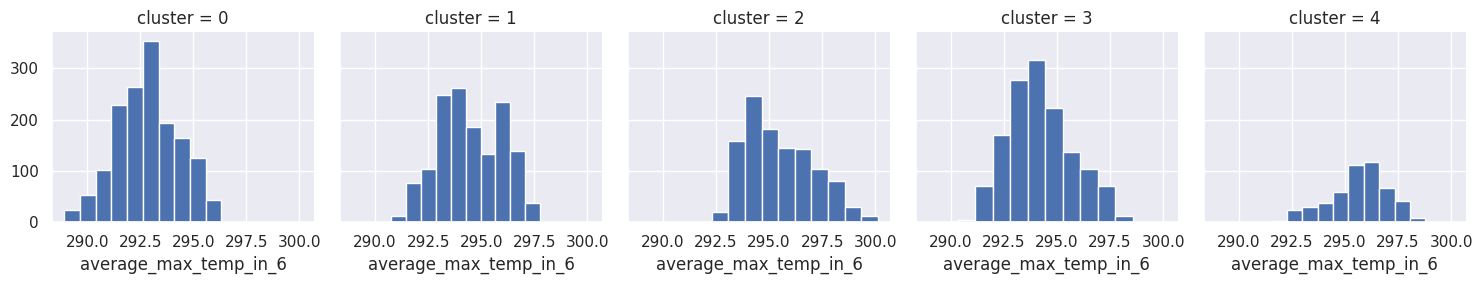

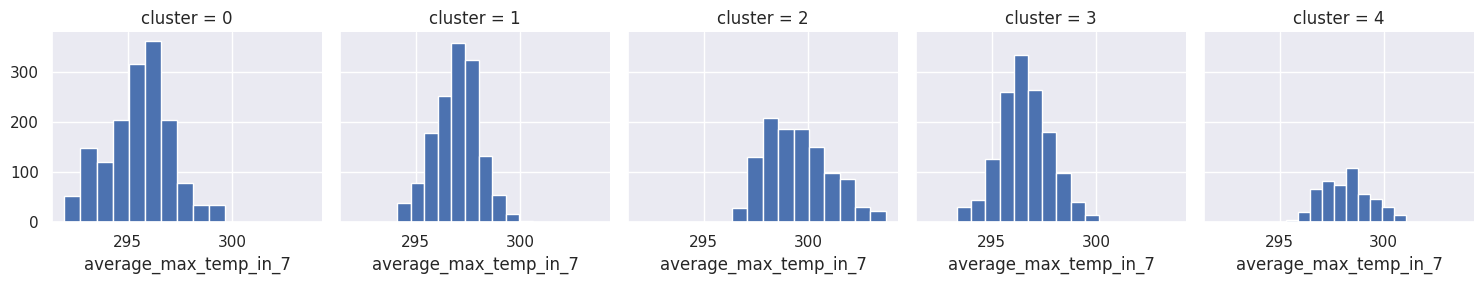

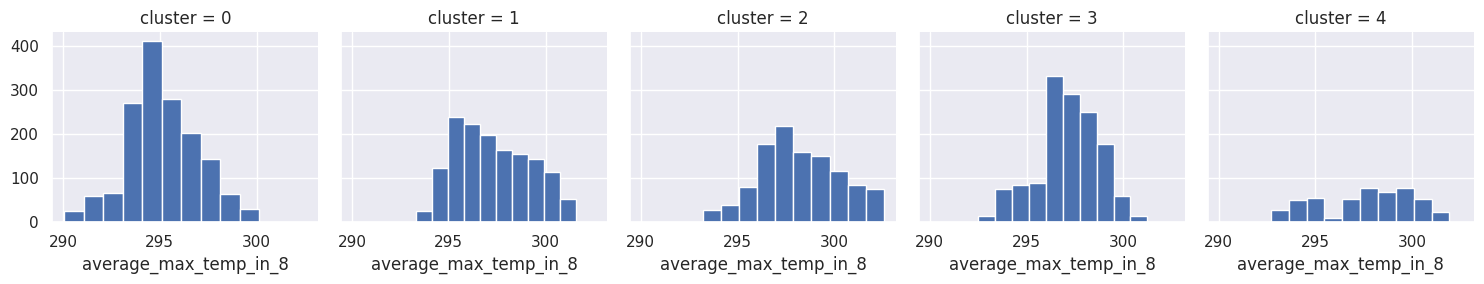

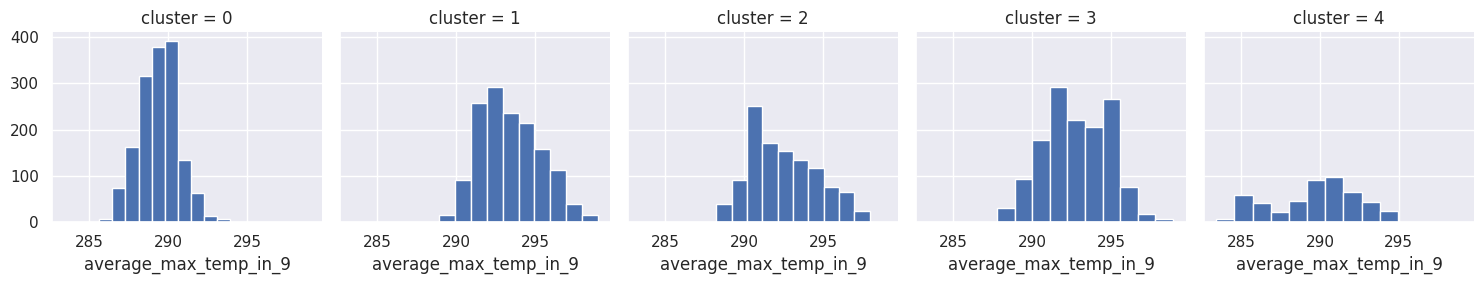

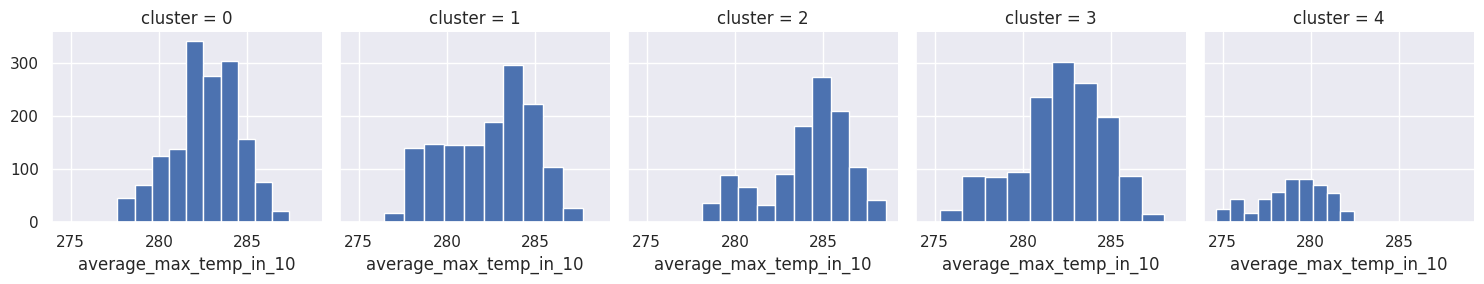

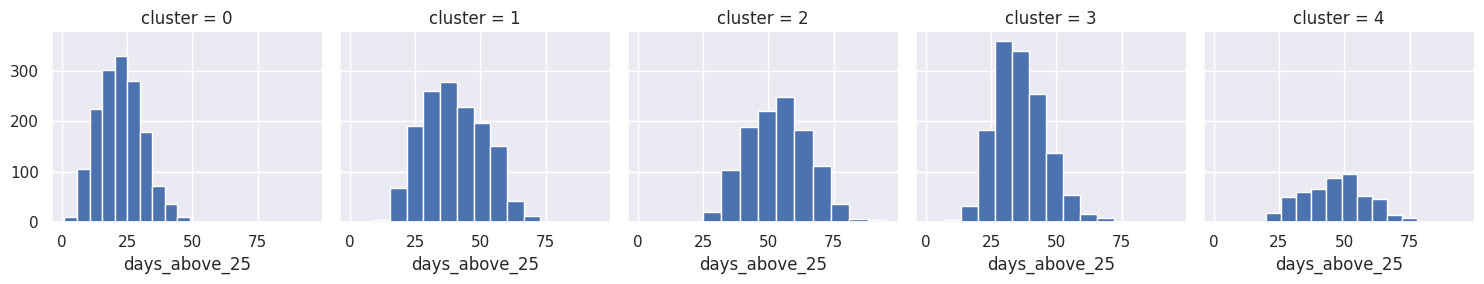

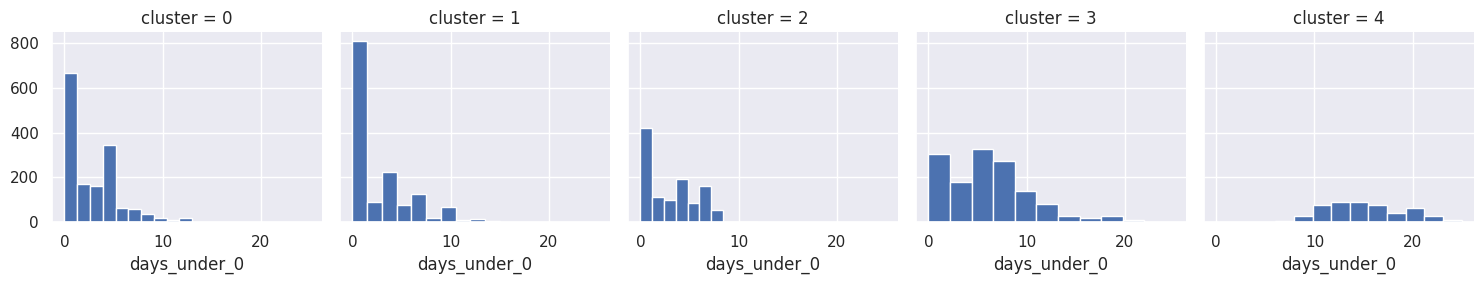

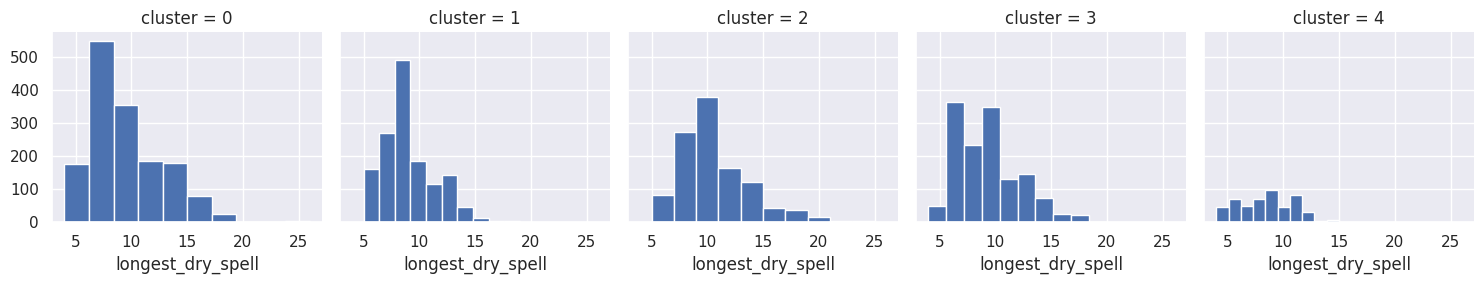

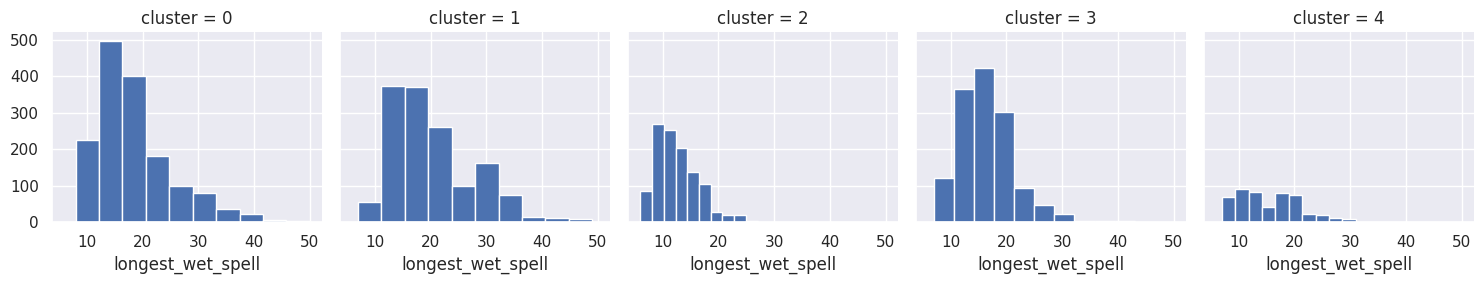

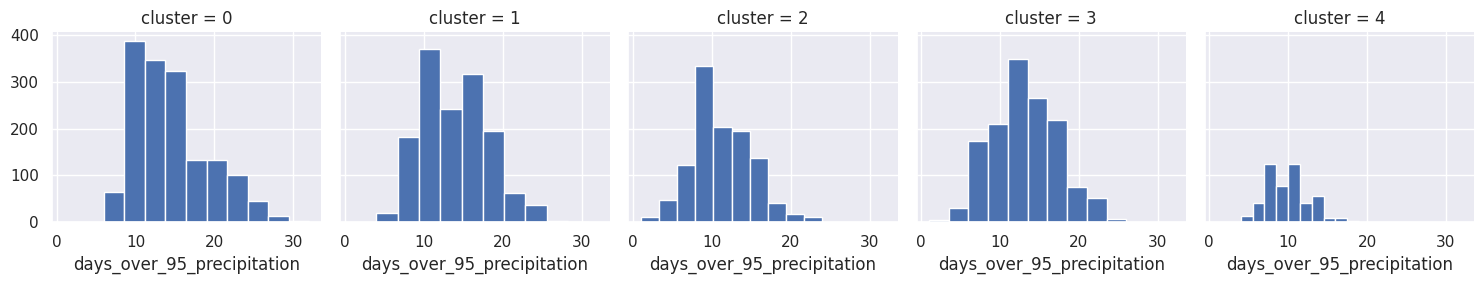

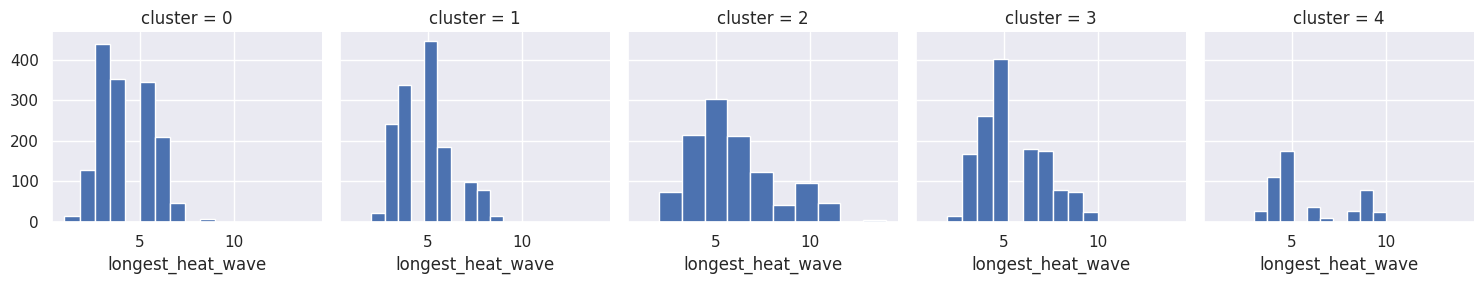

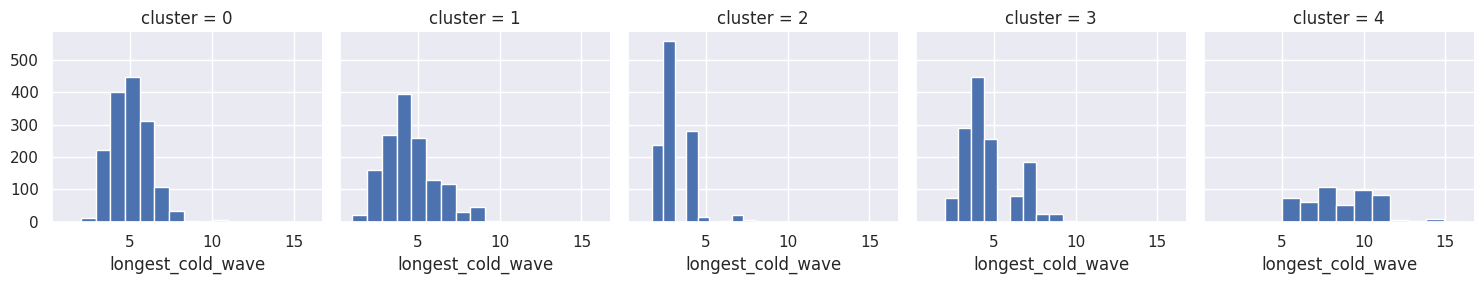

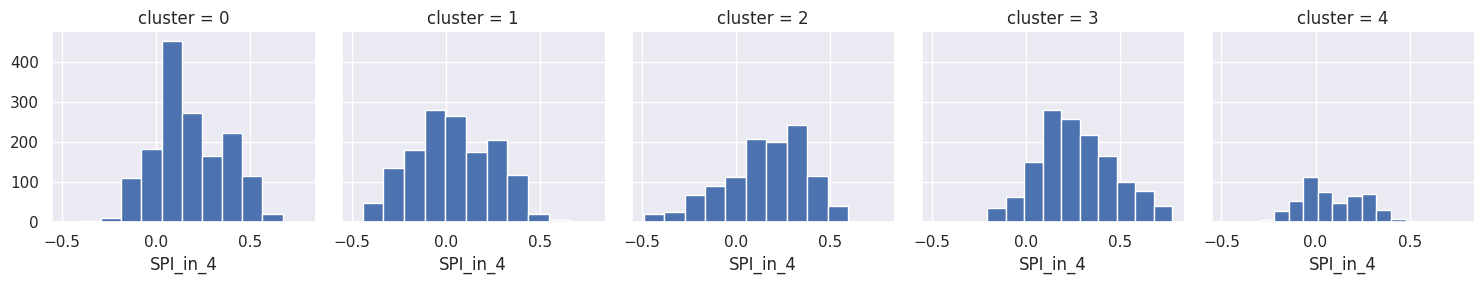

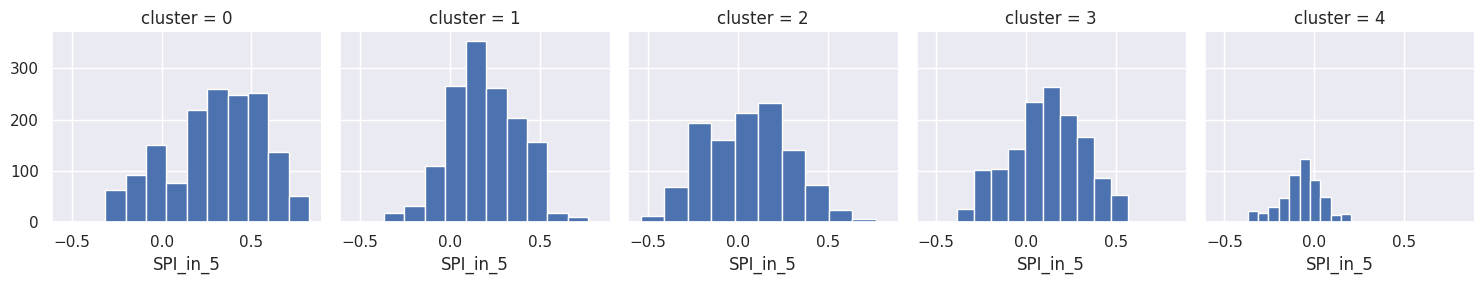

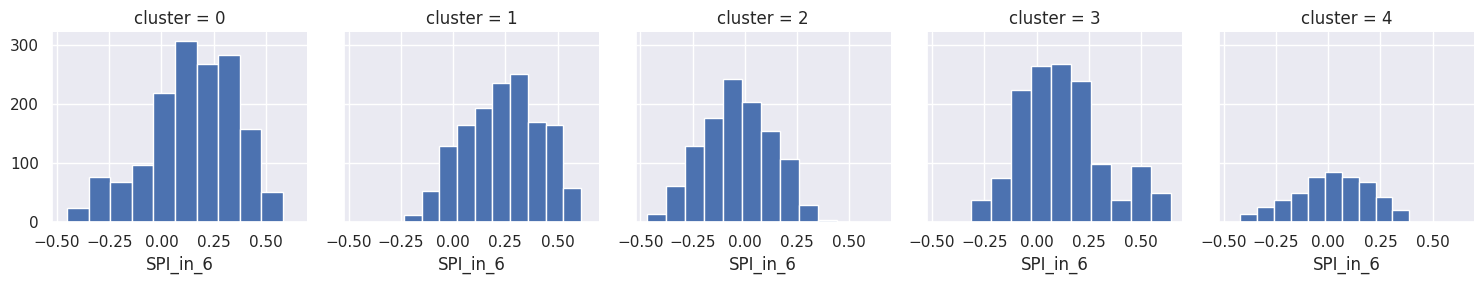

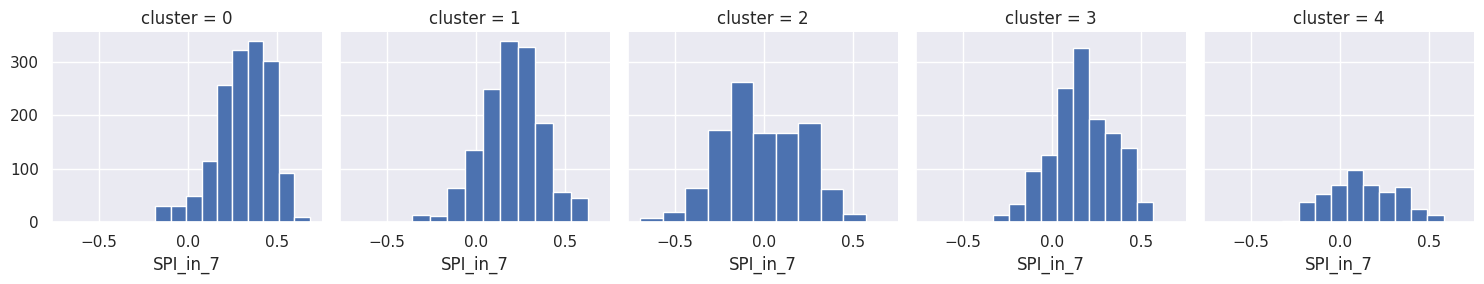

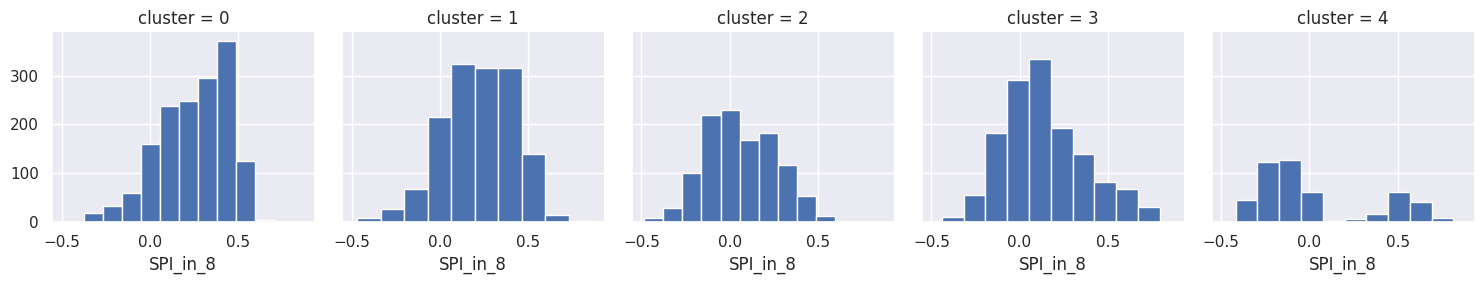

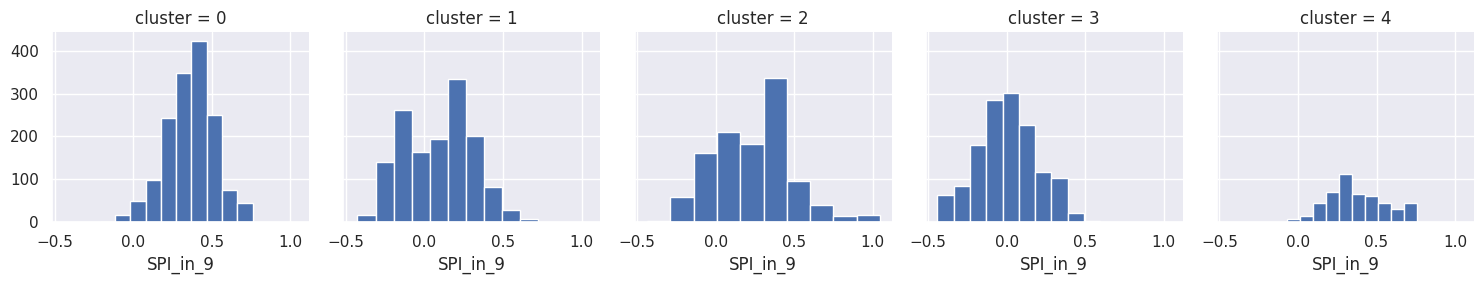

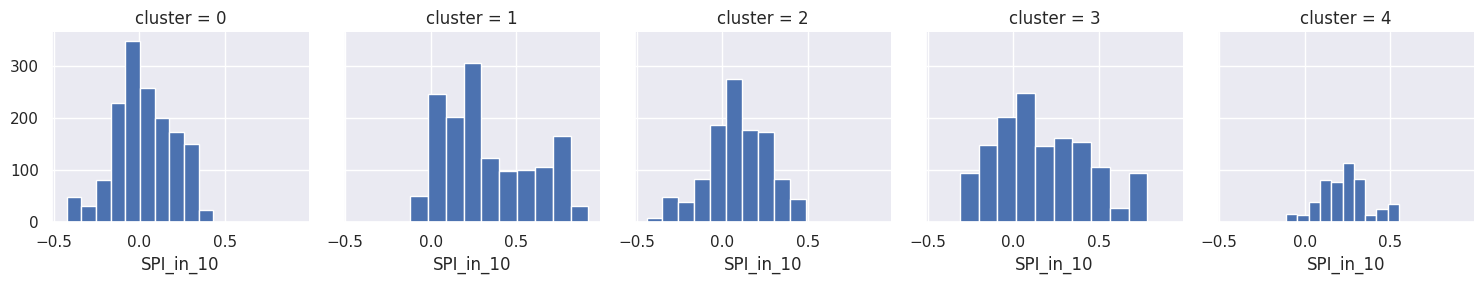

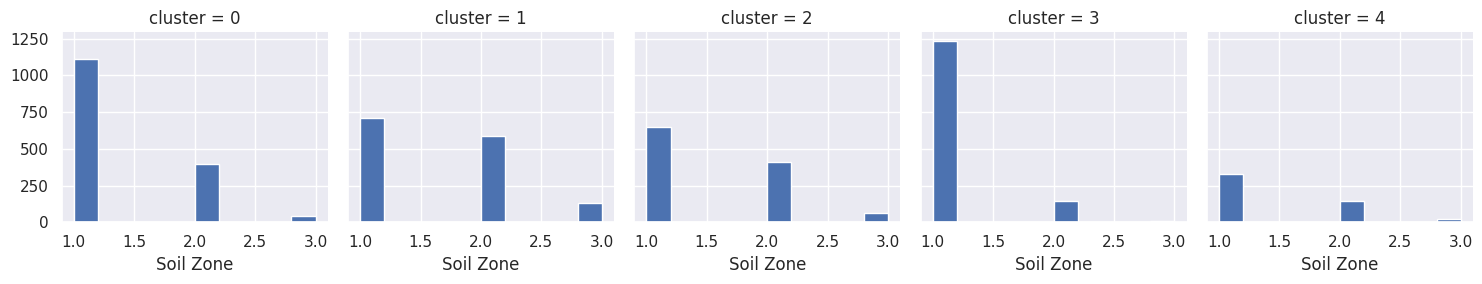

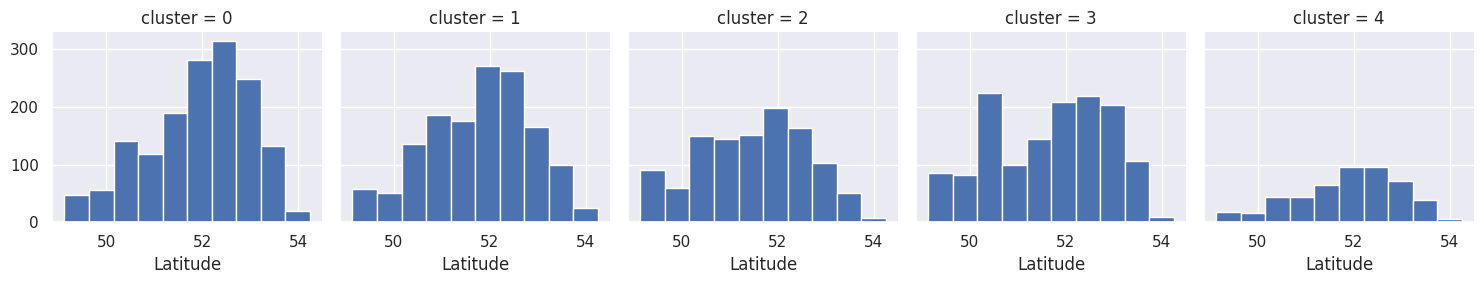

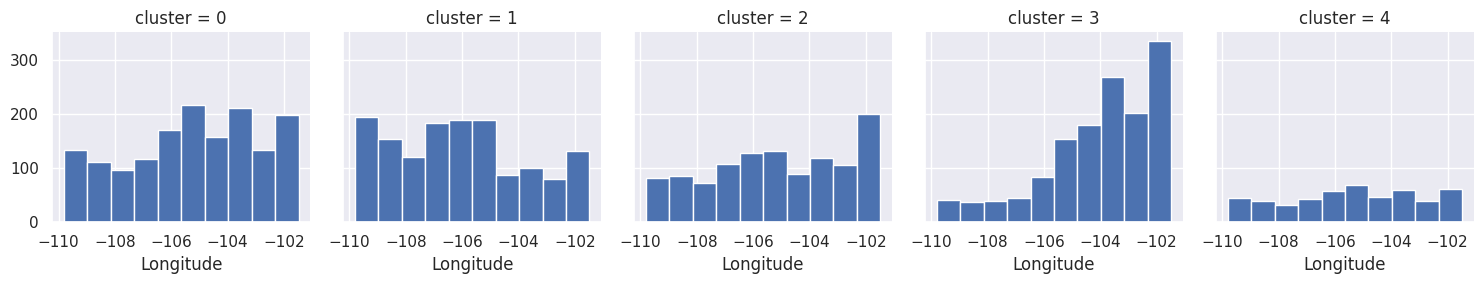

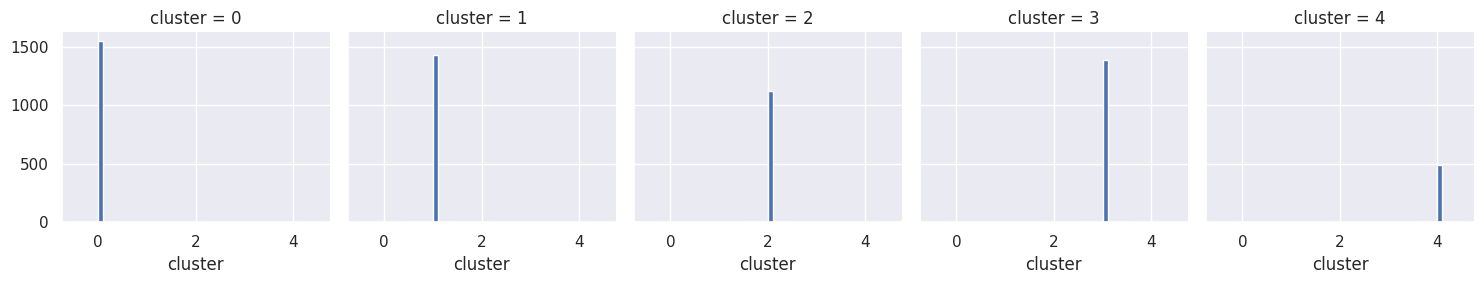

In [26]:
for c in clusters.iloc[:,1:]:
    grid= sns.FacetGrid(clusters.iloc[:,1:], col='cluster')
    grid.map(plt.hist, c)

In [27]:
dist = 1 - cosine_similarity(X)

pca = PCA(2)
pca.fit(dist)
X_PCA = pca.transform(dist)
X_PCA.shape

(5972, 2)

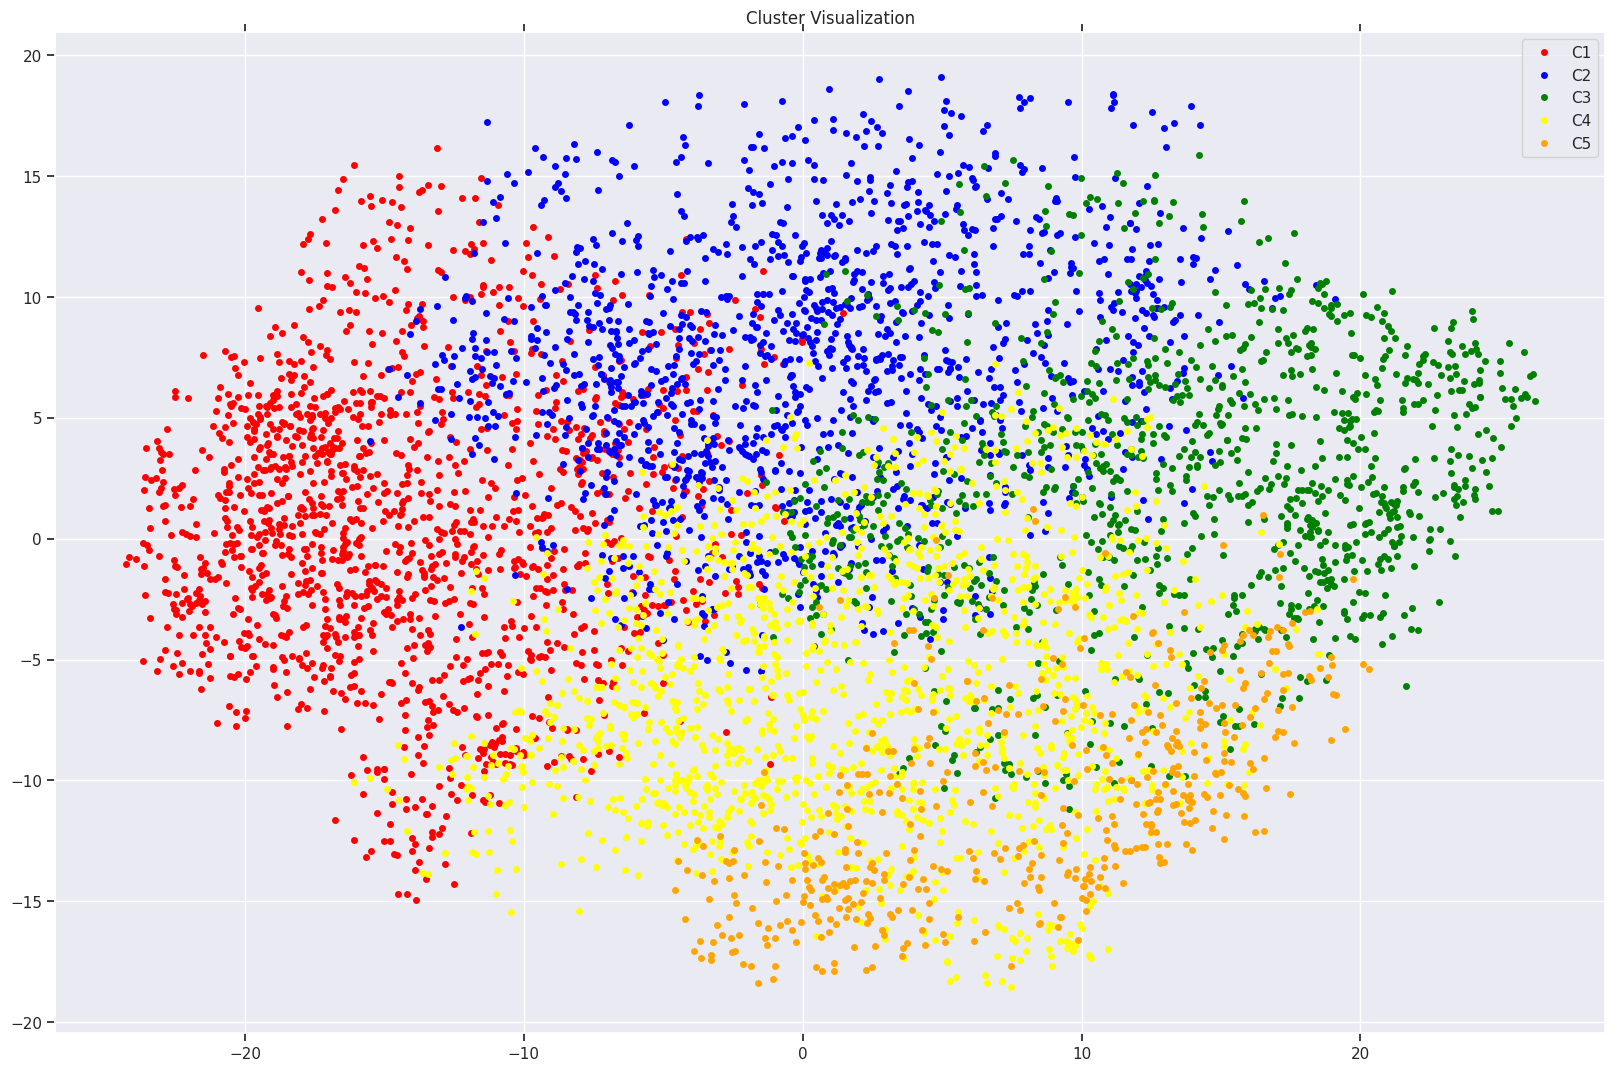

In [28]:
x, y = X_PCA[:, 0], X_PCA[:, 1]

colors = {
    0: 'red',
    1: 'blue',
    2: 'green',
    3: 'yellow',
    4: 'orange'
}

names = {0: 'C1', 
         1: 'C2', 
         2: 'C3', 
         3: 'C4', 
         4: 'C5'}

df = pd.DataFrame({'x': x, 'y':y, 'label':labels}) 
groups = df.groupby('label')

fig, ax = plt.subplots(figsize=(20, 13)) 

for name, group in groups:
    ax.plot(group.x, group.y, marker='o', linestyle='', ms=5,
            color=colors[name],label=names[name], mec='none')
    ax.set_aspect('auto')
    ax.tick_params(axis='x',which='both',bottom='off',top='off',labelbottom='off')
    ax.tick_params(axis= 'y',which='both',left='off',top='off',labelleft='off')
    
ax.legend()
ax.set_title("Cluster Visualization")
plt.show()

In [29]:
# lots of copypasta from https://www.kaggle.com/code/seifmohmed/analysis-visualize-and-clustering
# also bits of https://www.kaggle.com/code/ham9615/clustering-and-analysis-using-eda-and-k-means
# TODO: interpret clusters

## Modelling (1): Feature Subset

#### Preparation

In [31]:
# Assuming 'Canola' is the target variable
canola_complete = canola_subsubset.dropna() 
X = canola_complete.drop(['Canola'], axis=1)
y = canola_complete['Canola']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [32]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#### Fundamental Regressions

In [110]:
from sklearn.linear_model import RidgeCV
from sklearn.model_selection import cross_val_score

alphas = [0.1, 5.0, 10.0]  # Example values, you can define a range
ridge_cv = RidgeCV(alphas=alphas, store_cv_values=True)
ridge_cv.fit(X_train, y_train)

best_alpha = ridge_cv.alpha_
print(best_alpha)

classifiers = [
    LinearRegression(),
    Ridge(alpha=best_alpha),  # Adjust alpha as needed for Ridge regularization
    Lasso(alpha=1.0),  # Adjust alpha as needed for LASSO regularization
    ElasticNet(alpha=1.0, l1_ratio=0.5),  # Adjust alpha and l1_ratio as needed for ElasticNet
    svm.SVR(),
    linear_model.SGDRegressor(),
    linear_model.BayesianRidge(),
    linear_model.LassoLars(),
    linear_model.ARDRegression(),
    linear_model.PassiveAggressiveRegressor(),
    linear_model.TheilSenRegressor()
]

for clf in classifiers:
    print(clf)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)

    # Calculate evaluation metrics
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Print metrics
    print(f"Mean Squared Error: {mse:.2f}")
    print(f"R-squared: {r2:.2f}\n")
    
# ARD Regression seems good but does not beat Linear or Ridge

0.1
LinearRegression()
Mean Squared Error: 27.15
R-squared: 0.31

Ridge(alpha=0.1)
Mean Squared Error: 27.15
R-squared: 0.31

Lasso()
Mean Squared Error: 32.23
R-squared: 0.19

ElasticNet()
Mean Squared Error: 31.71
R-squared: 0.20

SVR()
Mean Squared Error: 38.74
R-squared: 0.02

SGDRegressor()
Mean Squared Error: 8874499588566579972445044736.00
R-squared: -224044397315254337329430528.00

BayesianRidge()
Mean Squared Error: 27.16
R-squared: 0.31

LassoLars()
Mean Squared Error: 32.23
R-squared: 0.19

ARDRegression()
Mean Squared Error: 27.17
R-squared: 0.31

PassiveAggressiveRegressor()
Mean Squared Error: 35.00
R-squared: 0.12

TheilSenRegressor()
Mean Squared Error: 28.01
R-squared: 0.29



#### LASSO Regression

In [108]:
# Fit LASSO regression model
lasso_model = Lasso(alpha=0.1)  # Adjust alpha as needed
lasso_model.fit(X_train_scaled, y_train)

# Get feature importance (coefficients)
lasso_coefs = lasso_model.coef_

# Make predictions
y_pred_lasso = lasso_model.predict(X_test_scaled)

# Evaluate the model
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)

# Print metrics
print(f"LASSO - Mean Squared Error: {mse_lasso:.2f}")
print(f"LASSO - R-squared: {r2_lasso:.2f}")

LASSO - Mean Squared Error: 27.64
LASSO - R-squared: 0.30


In [ ]:
# Variable Importance
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.bar(range(len(lasso_coefs)), lasso_coefs)
plt.xticks(range(len(X.columns)), X.columns, rotation=90)
plt.xlabel('Features')
plt.ylabel('LASSO Coefficients')
plt.title('LASSO Regression - Variable Importance')

# Regularization Paths
plt.subplot(1, 2, 2)
alphas, coefs_lasso, _ = LassoCV(alphas=np.logspace(-6, 8, 13)).path(X_train_scaled, y_train)
lines = plt.plot(np.log(alphas), coefs_lasso.T)
plt.xlabel('log(alpha)')
plt.ylabel('LASSO Coefficients')
plt.title('LASSO Regression - Regularization Paths')
plt.legend(lines, X.columns, loc='upper right')

plt.tight_layout()
plt.show()

In [ ]:
alphas, coefs_lasso, _ = LassoCV(alphas=np.logspace(-6, 8, 13)).path(X_train_scaled, y_train)

plt.figure(figsize=(17, 8))
lines = plt.plot(np.log(alphas), coefs_lasso.T)
plt.xlabel('log(alpha)')
plt.ylabel('LASSO Coefficients')
plt.title('LASSO Regression - Regularization Paths')
plt.legend(lines, X.columns, loc='upper right')
plt.show()

In [ ]:
# Lasso with 5 fold cross-validation
model = LassoCV(cv=5, random_state=0, max_iter=10000)

# Fit model
model.fit(X_train, y_train)

print(model.alpha_)

lasso_best = Lasso(alpha=model.alpha_)
lasso_best.fit(X_train, y_train)

In [ ]:
print(list(zip(lasso_best.coef_, X)))

print('R squared training set', round(lasso_best.score(X_train, y_train)*100, 2))
print('R squared test set', round(lasso_best.score(X_test, y_test)*100, 2))

In [ ]:
# SUBSETTING 13 LARGEST COEFS
coefficients = lasso_best.coef_
variable_names = X.columns

# Create a list of tuples with absolute coefficients and variable names
coefficients_with_names = list(zip(np.abs(coefficients), variable_names))

# Sort the list based on absolute coefficients in descending order
coefficients_with_names.sort(key=lambda x: x[0], reverse=True)

# Select the top 6 variables
top_6_variables = [var for coef, var in coefficients_with_names[:6]]

# Create a subset of the DataFrame with only the top 6 variables
subset_df = canola_subsubset[top_6_variables + ['Canola']]

clean_subset = subset_df.dropna()

# Print the subset DataFrame
print(clean_subset.columns)

# Select features and target variable
X_subset = clean_subset.drop('Canola', axis=1).dropna()
y_subset = clean_subset['Canola']

# Train-test split
X_train_subset, X_test_subset, y_train_subset, y_test_subset = train_test_split(X_subset, y_subset, test_size=0.2, random_state=42)

# Standardize the features
scaler_subset = StandardScaler()
X_train_scaled_subset = scaler_subset.fit_transform(X_train_subset)
X_test_scaled_subset = scaler_subset.transform(X_test_subset)

# Fit LASSO regression model with cross-validated alpha selection
lasso_cv_model_subset = LassoCV(alphas=np.logspace(-4, 4, 100), cv=5)
lasso_cv_model_subset.fit(X_train_scaled_subset, y_train_subset)

# Get the optimal alpha
optimal_alpha_subset = lasso_cv_model_subset.alpha_

# Print optimal alpha
print(f"Optimal Alpha for Subset: {optimal_alpha_subset}")

# Get coefficients for each alpha in the subset model
coefs_lasso_subset = lasso_cv_model_subset.coef_

# Print the coefficients for the subset model
print(list(zip(coefs_lasso_subset, X_subset.columns)))

# Make predictions on training set
y_train_pred_subset = lasso_cv_model_subset.predict(X_train_scaled_subset)

# Make predictions on test set
y_test_pred_subset = lasso_cv_model_subset.predict(X_test_scaled_subset)

# Compute R-squared values
r2_train_subset = r2_score(y_train_subset, y_train_pred_subset)
r2_test_subset = r2_score(y_test_subset, y_test_pred_subset)

# Print R-squared values
print(f"R-squared (Training) for Subset: {r2_train_subset:.2f}")
print(f"R-squared (Test) for Subset: {r2_test_subset:.2f}")

#### SVM

In [33]:
svm_regressor = SVR(kernel='rbf', C=1.0, gamma='scale')

In [34]:
svm_regressor.fit(X_train_scaled, y_train)

SVR()

In [35]:
y_pred = svm_regressor.predict(X_test_scaled)

In [36]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared: {r2:.2f}")

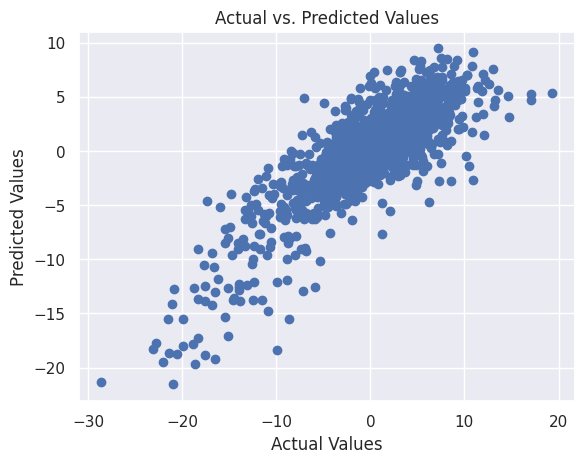

In [38]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')

plt.subplot(1, 2, 2)
residuals = y_test - y_pred
plt.scatter(y_test, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Actual Values')
plt.ylabel('Residuals')
plt.title('Residual Plot') # strong signs of non-linearity in data

plt.tight_layout()
plt.show()

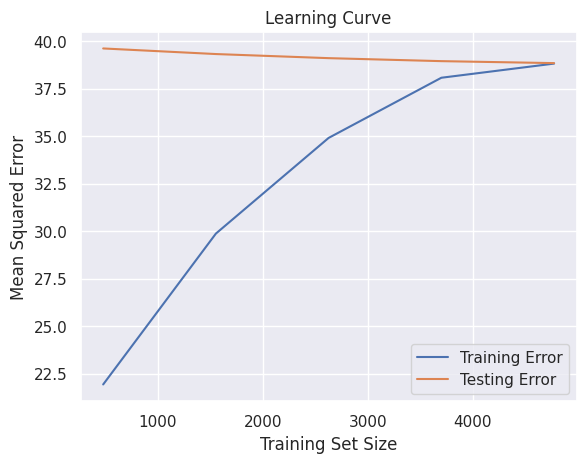

In [41]:
train_sizes, train_scores, test_scores = learning_curve(svm_regressor, X, y, cv=5, scoring='neg_mean_squared_error')
train_scores_mean = -np.mean(train_scores, axis=1)
test_scores_mean = -np.mean(test_scores, axis=1)

plt.plot(train_sizes, train_scores_mean, label='Training Error')
plt.plot(train_sizes, test_scores_mean, label='Testing Error')
plt.xlabel('Training Set Size')
plt.ylabel('Mean Squared Error')
plt.title('Learning Curve')
plt.legend()
plt.show()

#### Random Forest Regression

In [103]:
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor.fit(X_train, y_train)

# Make predictions
y_pred = rf_regressor.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print metrics
print(f"Random Forest - Mean Squared Error: {mse:.2f}")
print(f"Random Forest - R-squared: {r2:.2f}")

Random Forest - Mean Squared Error: 10.16
Random Forest - R-squared: 0.74


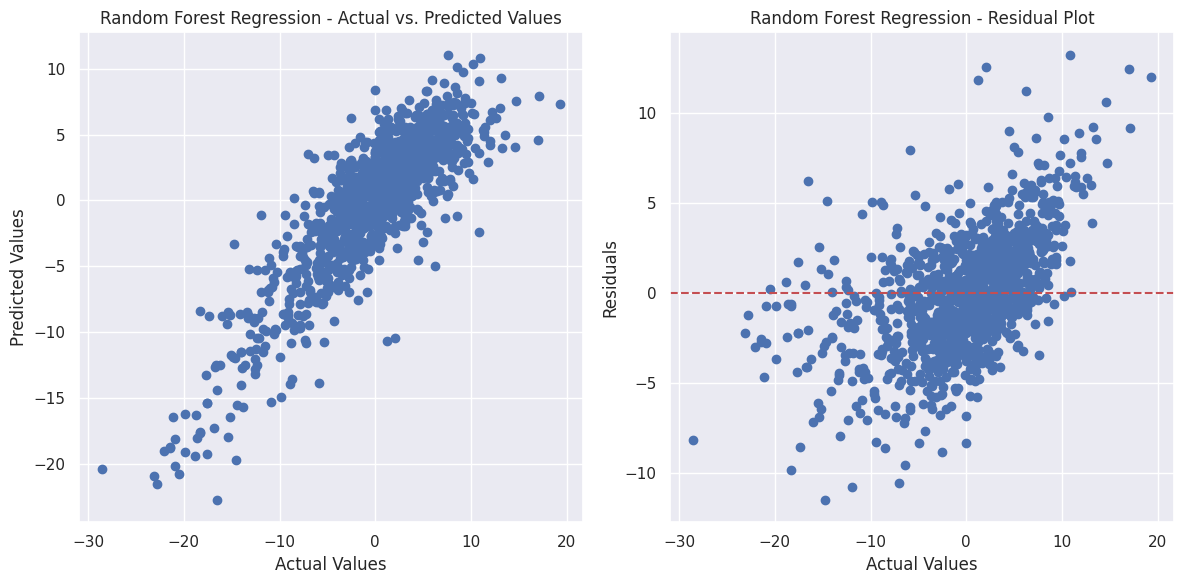

In [104]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Random Forest Regression - Actual vs. Predicted Values')

plt.subplot(1, 2, 2)
residuals_rf = y_test - y_pred
plt.scatter(y_test, residuals_rf)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Actual Values')
plt.ylabel('Residuals')
plt.title('Random Forest Regression - Residual Plot')

plt.tight_layout()
plt.show()

#### LSTM

Epoch 1/50


/opt/conda/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:205: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


150/150 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 37.1373
Epoch 2/50
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 26.5445
Epoch 3/50
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 20.7856
Epoch 4/50
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 19.1456
Epoch 5/50
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 18.6132
Epoch 6/50
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 16.4110
Epoch 7/50
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 16.0178
Epoch 8/50
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 15.1240
Epoch 9/50
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 14.8160
Epoch 10/50
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 14.5087
Epoch 11/50
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 13.9358
Epoch 12/50
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 13.2321
Epoch 13/50
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 13.2972
Epoch 14/50
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 13.0778
Epoch 15/50
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step -

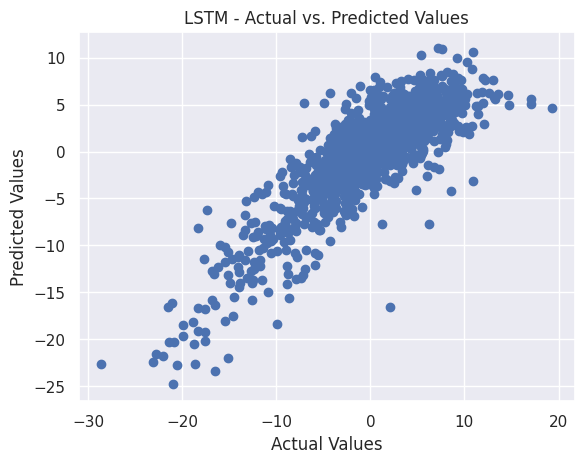

In [105]:
X_train_lstm = X_train_scaled.reshape((X_train_scaled.shape[0], 1, X_train_scaled.shape[1]))
X_test_lstm = X_test_scaled.reshape((X_test_scaled.shape[0], 1, X_test_scaled.shape[1]))

model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(1, X_train_scaled.shape[1])))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

history = model.fit(X_train_lstm, y_train, epochs=50, batch_size=32, verbose=1)

y_pred_lstm = model.predict(X_test_lstm).flatten()

mse_lstm = mean_squared_error(y_test, y_pred_lstm)
r2_lstm = r2_score(y_test, y_pred_lstm)
print(f"LSTM - Mean Squared Error: {mse_lstm:.2f}")
print(f"LSTM - R-squared: {r2_lstm:.2f}")

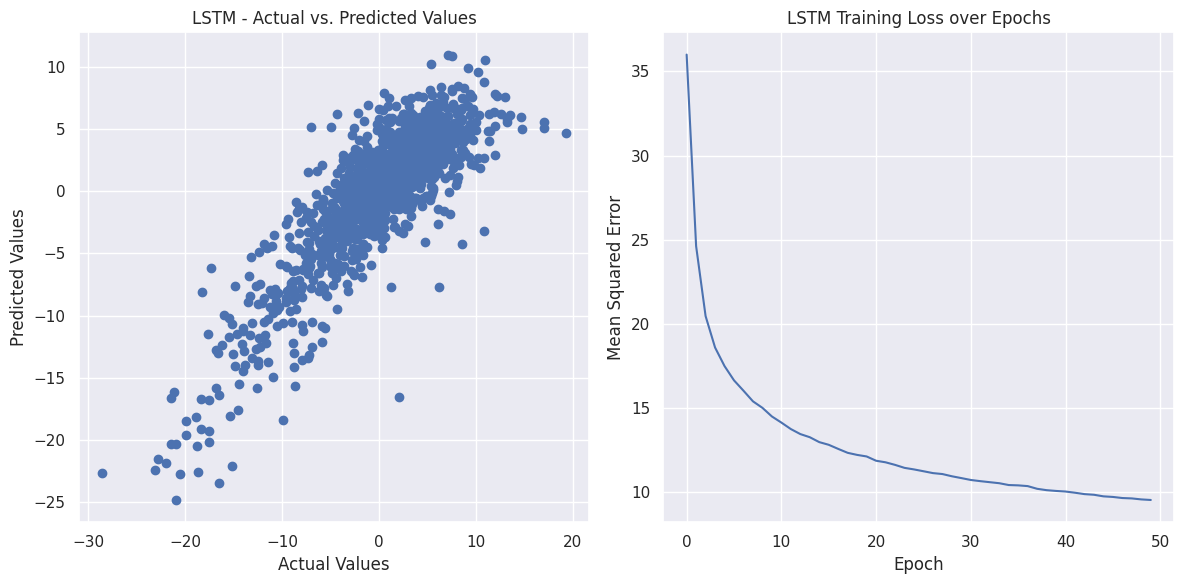

In [107]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred_lstm)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('LSTM - Actual vs. Predicted Values')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.title('LSTM Training Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error')

plt.tight_layout()
plt.show()

## Approach 2: PCA, Clustering & PCR

In [113]:
canola_subsubset_exc = canola_subsubset.drop(columns=['Canola'])
standard_scaler = StandardScaler()
canola_scaled = standard_scaler.fit_transform(canola_subsubset_exc)

In [114]:
pca = PCA(svd_solver='randomized', random_state=42)
pca.fit(canola_scaled)

PCA(random_state=42, svd_solver='randomized')

In [115]:
pca.components_

array([[-3.02926302e-02,  2.71381937e-01,  4.09038676e-01,
         3.07371528e-01,  4.87539252e-01,  5.23517611e-02,
         6.52095690e-02, -2.71875375e-01,  2.26724908e-01,
        -3.53742008e-02, -7.96758723e-02, -2.09537781e-01,
        -2.37849369e-01, -2.86313905e-01, -2.06994995e-01,
        -1.31272007e-01,  1.23581016e-02,  1.58302931e-01,
        -1.34685513e-01, -1.22782401e-02],
       [-4.91431626e-01, -1.10517266e-02, -1.15086671e-01,
        -2.05910858e-01, -7.00127017e-02,  5.13016748e-01,
        -1.15061745e-01, -1.16291274e-01,  1.86249042e-01,
         3.81552622e-01,  1.40590941e-01, -2.23027375e-01,
        -2.22680924e-01, -3.25724304e-02, -1.23163727e-01,
         9.58351018e-02, -2.22903647e-02, -2.39000352e-01,
         1.39257568e-01,  7.80224778e-02],
       [ 2.21057380e-01,  3.14716123e-01, -3.51324972e-02,
        -2.74902571e-01, -1.22325067e-02, -5.20302869e-02,
         9.78519594e-02, -3.99917938e-02, -3.65779651e-02,
         1.23879788e-01, -2.2

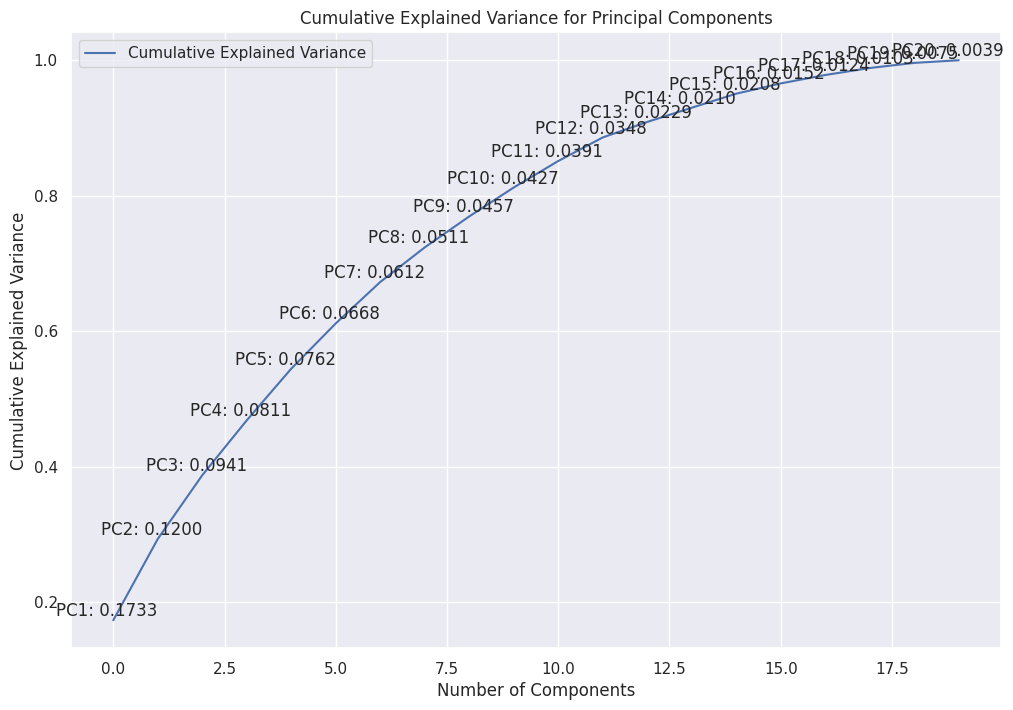

In [118]:
fig = plt.figure(figsize=(12, 8))
explained_variance_ratios = pca.explained_variance_ratio_

plt.plot(np.cumsum(explained_variance_ratios), label='Cumulative Explained Variance')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance for Principal Components')

for i, ratio in enumerate(explained_variance_ratios):
    plt.text(i + 1, np.cumsum(explained_variance_ratios)[i], f'PC{i + 1}: {ratio:.4f}', ha='right', va='bottom')

plt.legend()
plt.show()

# may need about 10 PCs

In [120]:
colnames = list(canola_subsubset_exc.columns)

pcs_df = pd.DataFrame({'Feature': colnames,
                       'PC1': pca.components_[0],
                       'PC2': pca.components_[1],
                       'PC3': pca.components_[2],
                       'PC4': pca.components_[3],
                       'PC5': pca.components_[4],
                       'PC6': pca.components_[5],
                       'PC7': pca.components_[6],
                       'PC8': pca.components_[7],
                       'PC9': pca.components_[8],
                       'PC10': pca.components_[9]})

pcs_df

Feature       PC1       PC2       PC3       PC4       PC5  \
0   average_max_temp_in_4 -0.030293 -0.491432  0.221057  0.163814 -0.154718   
1   average_max_temp_in_5  0.271382 -0.011052  0.314716  0.340195  0.124695   
2   average_max_temp_in_7  0.409039 -0.115087 -0.035132 -0.081893 -0.151531   
3   average_max_temp_in_9  0.307372 -0.205911 -0.274903 -0.071181  0.377148   
4           days_above_25  0.487539 -0.070013 -0.012233  0.036705 -0.031091   
5            days_under_0  0.052352  0.513017 -0.052030 -0.015857  0.134293   
6       longest_dry_spell  0.065210 -0.115062  0.097852 -0.384186 -0.072400   
7       longest_wet_spell -0.271875 -0.116291 -0.039992  0.189208  0.194906   
8       longest_heat_wave  0.226725  0.186249 -0.036578 -0.102794 -0.066227   
9       longest_cold_wave -0.035374  0.381553  0.123880  0.190774  0.258253   
10               SPI_in_4 -0.079676  0.140591 -0.228542 -0.390041 -0.135604   
11               SPI_in_5 -0.209538 -0.223027 -0.092281 -0.267725 -0.056307   
12               SPI_in_6 -0.237849 -0.222681 -0.156862 -0.020004  0.140654   
13               SPI_in_7 -0.286314 -0.032572  0.011281  0.169192  0.144139   
14               SPI_in_8 -0.206995 -0.123164 -0.108513  0.026316  0.104782   
15               SPI_in_9 -0.131272  0.095835  0.425038  0.220545 -0.387749   
16              SPI_in_10  0.012358 -0.022290 -0.106790  0.151004  0.487991   
17              Soil Zone  0.158303 -0.239000  0.211254 -0.016589  0.226947   
18               Latitude -0.134686  0.139258  0.389056 -0.397929  0.190430   
19              Longitude -0.012278  0.078022 -0.509173  0.360706 -0.335631   

         PC6       PC7       PC8       PC9      PC10  
0   0.064289 -0.079828 -0.098340 -0.000482 -0.237225  
1  -0.083692  0.009164  0.235300  0.127061  0.192687  
2   0.288827 -0.202219  0.004530  0.058581 -0.007641  
3  -0.125998  0.049553  0.100859 -0.185216 -0.017825  
4   0.164825  0.046724  0.052074  0.123704 -0.083923  
5   0.335094  0.001622 -0.017753  0.098224 -0.094656  
6  -0.113783  0.274280 -0.092664  0.586431  0.088676  
7   0.095508 -0.172482  0.268744  0.498731  0.185532  
8  -0.107035 -0.259171 -0.354578  0.297058  0.083451  
9   0.254301  0.099531 -0.029948 -0.166420 -0.107659  
10  0.320380  0.245795  0.153908  0.073135  0.224582  
11  0.294370 -0.045633 -0.216872 -0.073873 -0.462461  
12  0.333166 -0.194630  0.466143  0.068153  0.043095  
13 -0.162828  0.565232 -0.163162  0.147542 -0.091832  
14  0.088283 -0.279404 -0.488039 -0.154177  0.617121  
15  0.317220 -0.054914 -0.086665  0.103980 -0.000632  
16  0.113682 -0.183048 -0.331534  0.335281 -0.314251  
17  0.378658  0.364969 -0.167333 -0.126807  0.246476  
18 -0.233561 -0.313525  0.124842 -0.036287 -0.100980  
19 -0.076344  0.000397 -0.022024  0.104806 -0.065104

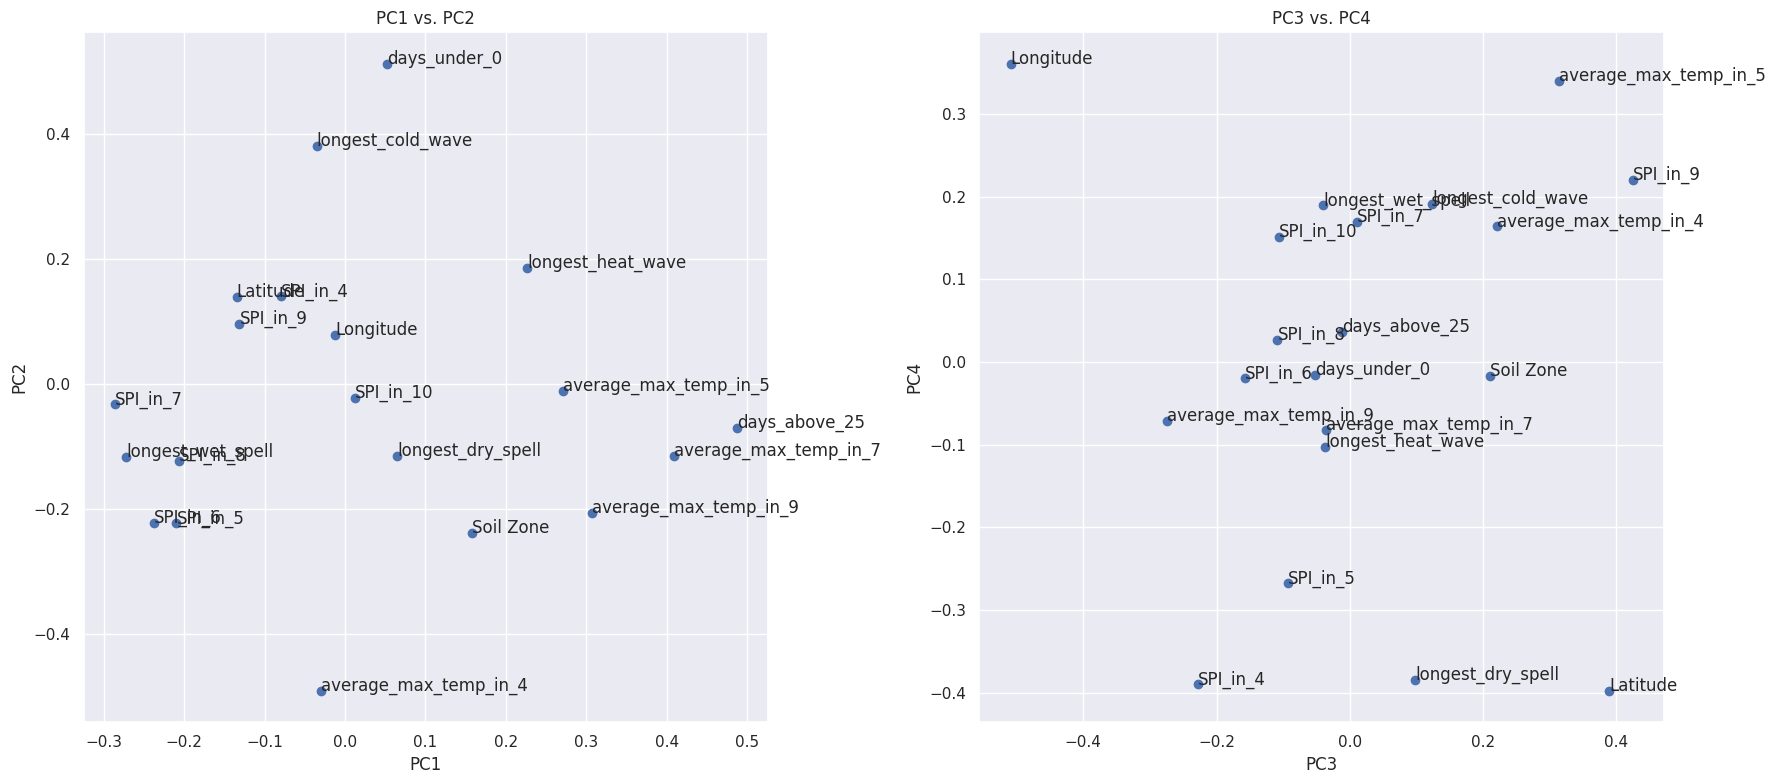

In [122]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 8))

# PC 1 vs. 2
ax1.scatter(pcs_df.PC1, pcs_df.PC2)
ax1.set_xlabel('PC1')
ax1.set_ylabel('PC2')
for i, txt in enumerate(pcs_df.Feature):
    ax1.annotate(txt, (pcs_df.PC1[i], pcs_df.PC2[i]))
ax1.set_title('PC1 vs. PC2')

# PC 3 vs. 4
ax2.scatter(pcs_df.PC3, pcs_df.PC4)
ax2.set_xlabel('PC3')
ax2.set_ylabel('PC4')
for i, txt in enumerate(pcs_df.Feature):
    ax2.annotate(txt, (pcs_df.PC3[i], pcs_df.PC4[i]))
ax2.set_title('PC3 vs. PC4')

plt.tight_layout()
plt.show()

In [130]:
from sklearn.decomposition import IncrementalPCA

pca_inc = IncrementalPCA(n_components=11) # 10 PCs

df_pca_2 = pca_inc.fit_transform(canola_scaled)

princomp = np.transpose(df_pca_2)

corrs = np.corrcoef(princomp)

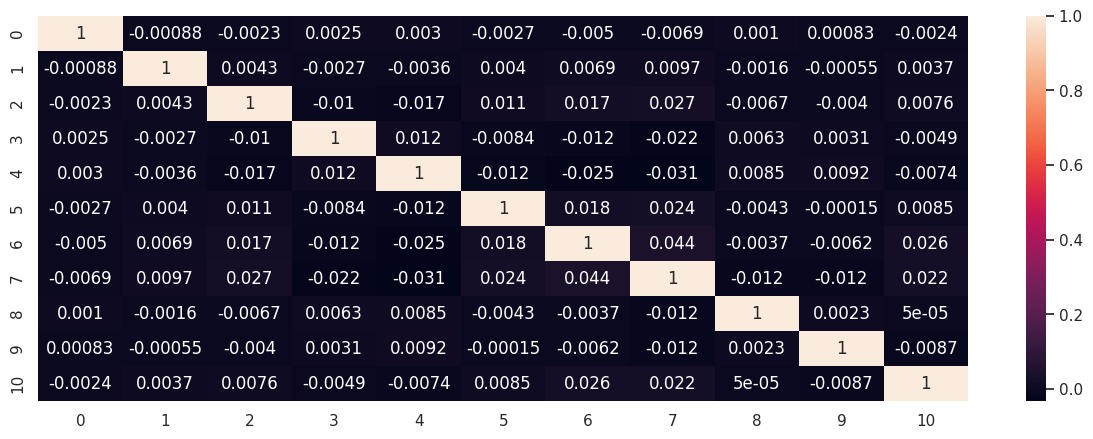

In [131]:
plt.figure(figsize = (15,5))
sns.heatmap(corrs,annot = True)
plt.show() # confirm correlations erased

In [150]:
pcs_df_2 = pd.DataFrame({'PC1': princomp[0],
                        'PC2': princomp[1],
                        'PC3': princomp[2],
                        'PC4': princomp[3],
                        'PC5': princomp[4],
                        'PC6': princomp[5],
                        'PC7': princomp[6],
                        'PC8': princomp[7],
                        'PC9': princomp[8],
                        'PC10': princomp[9]})

pcs_df_2

PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0     2.817811 -0.925802 -1.270503  0.967628  1.920813 -0.308199 -0.070525   
1     0.632007 -0.798444 -0.385040  0.768172  1.824720 -1.236221 -0.446495   
2     0.183259  0.708382  0.395778  1.380898  1.861708  1.270494 -0.079127   
3    -1.092084  0.080072  0.372733  1.944536  2.182070  1.520124 -0.629036   
4     0.548398 -1.547588 -0.869934  2.637756  1.180478 -0.465085 -0.933439   
...        ...       ...       ...       ...       ...       ...       ...   
5967  0.110249  3.242541  4.314229 -0.053435 -0.668030 -0.523036 -0.069980   
5968 -3.611512 -0.619867  1.184275  1.015022 -0.979896 -0.158899  0.338673   
5969 -0.871739  3.821652  1.393659  0.601687 -2.407643  0.564910 -0.943204   
5970  3.469251 -1.118440  1.394622 -2.598296  0.541829  1.998692  2.414593   
5971  1.006356  0.458097 -0.247305 -3.013032 -1.783240  2.203916  0.350396   

           PC8       PC9      PC10  
0    -0.699540 -0.668124 -0.413849  
1    -1.302821  0.249170 -0.491384  
2    -1.130217 -1.189426 -0.087657  
3    -0.791369 -0.661429  0.306843  
4     0.008194 -0.397463  0.551325  
...        ...       ...       ...  
5967  1.187078  0.289303  0.049359  
5968  1.839307  0.076733  0.629291  
5969 -0.200330 -1.708272 -1.514968  
5970  1.584425 -0.107035 -0.838454  
5971  2.665266  1.025127 -0.548357  

[5972 rows x 10 columns]

In [152]:
pcs_df_2b = pd.DataFrame({'Feature': colnames,
                       'PC1': pca_inc.components_[0],
                       'PC2': pca_inc.components_[1],
                       'PC3': pca_inc.components_[2],
                       'PC4': pca_inc.components_[3],
                       'PC5': pca_inc.components_[4],
                       'PC6': pca_inc.components_[5],
                       'PC7': pca_inc.components_[6],
                       'PC8': pca_inc.components_[7],
                       'PC9': pca_inc.components_[8],
                       'PC10': pca_inc.components_[9]})

pcs_df_2b

Feature       PC1       PC2       PC3       PC4       PC5  \
0   average_max_temp_in_4 -0.030873 -0.493252  0.256467  0.024159  0.170612   
1   average_max_temp_in_5  0.270018 -0.016518  0.380498  0.293826  0.020531   
2   average_max_temp_in_7  0.409712 -0.118739 -0.047657 -0.147426  0.043956   
3   average_max_temp_in_9  0.306967 -0.200323 -0.342104  0.221332 -0.227736   
4           days_above_25  0.485206 -0.064457  0.012097 -0.005290 -0.036641   
5            days_under_0  0.052671  0.516540 -0.031263  0.020739 -0.227775   
6       longest_dry_spell  0.066878 -0.122340  0.014516 -0.382122 -0.179860   
7       longest_wet_spell -0.273401 -0.116958 -0.027270  0.275164 -0.079281   
8       longest_heat_wave  0.227183  0.189948 -0.041857 -0.109296  0.058963   
9       longest_cold_wave -0.035063  0.386393  0.183628  0.238134 -0.279904   
10               SPI_in_4 -0.081617  0.154348 -0.263409 -0.409890 -0.210305   
11               SPI_in_5 -0.213581 -0.217395 -0.132145 -0.280661 -0.162181   
12               SPI_in_6 -0.239895 -0.209037 -0.153544  0.070864 -0.148990   
13               SPI_in_7 -0.290350 -0.018265  0.079841  0.174222 -0.146620   
14               SPI_in_8 -0.209068 -0.116003 -0.104964  0.091385 -0.058169   
15               SPI_in_9 -0.132440  0.097271  0.539401 -0.145719  0.201877   
16              SPI_in_10  0.014595 -0.025763 -0.131506  0.425472 -0.239203   
17              Soil Zone  0.153443 -0.238326  0.227462 -0.006503 -0.479780   
18               Latitude -0.118841  0.093050  0.180848 -0.182783 -0.183686   
19              Longitude -0.022831  0.114246 -0.334789  0.159053  0.513304   

         PC6       PC7       PC8       PC9      PC10  
0  -0.126353  0.061081 -0.169667  0.069212 -0.204660  
1   0.094231 -0.050292  0.342210  0.033132  0.117195  
2  -0.374962 -0.061049 -0.084426  0.085325  0.107583  
3   0.157709 -0.009775  0.078414 -0.204018 -0.079518  
4  -0.113780 -0.091039 -0.017472  0.134386 -0.110125  
5  -0.257116 -0.108069 -0.104471  0.124559  0.038298  
6   0.298080  0.024090  0.062910  0.555973  0.253485  
7  -0.182503 -0.002402  0.439663  0.385932 -0.065328  
8  -0.002189  0.604574  0.203604  0.216237 -0.332334  
9  -0.122044  0.004571 -0.082957 -0.157911 -0.252475  
10 -0.100350 -0.183625  0.028210  0.054027  0.187510  
11 -0.215308  0.108920 -0.207576 -0.016044 -0.538000  
12 -0.374145 -0.297389  0.408088 -0.004440 -0.000986  
13  0.454972 -0.134750 -0.292510  0.198389 -0.072940  
14 -0.189087  0.597166 -0.072587 -0.232618  0.543845  
15 -0.325603 -0.044429 -0.139281  0.133171  0.112215  
16 -0.173834  0.181851 -0.327701  0.471558  0.057575  
17 -0.063449 -0.071202 -0.197495 -0.144992  0.123947  
18  0.105021  0.200576  0.312163 -0.066133 -0.114301  
19 -0.055833 -0.121254 -0.139730  0.140453  0.012206

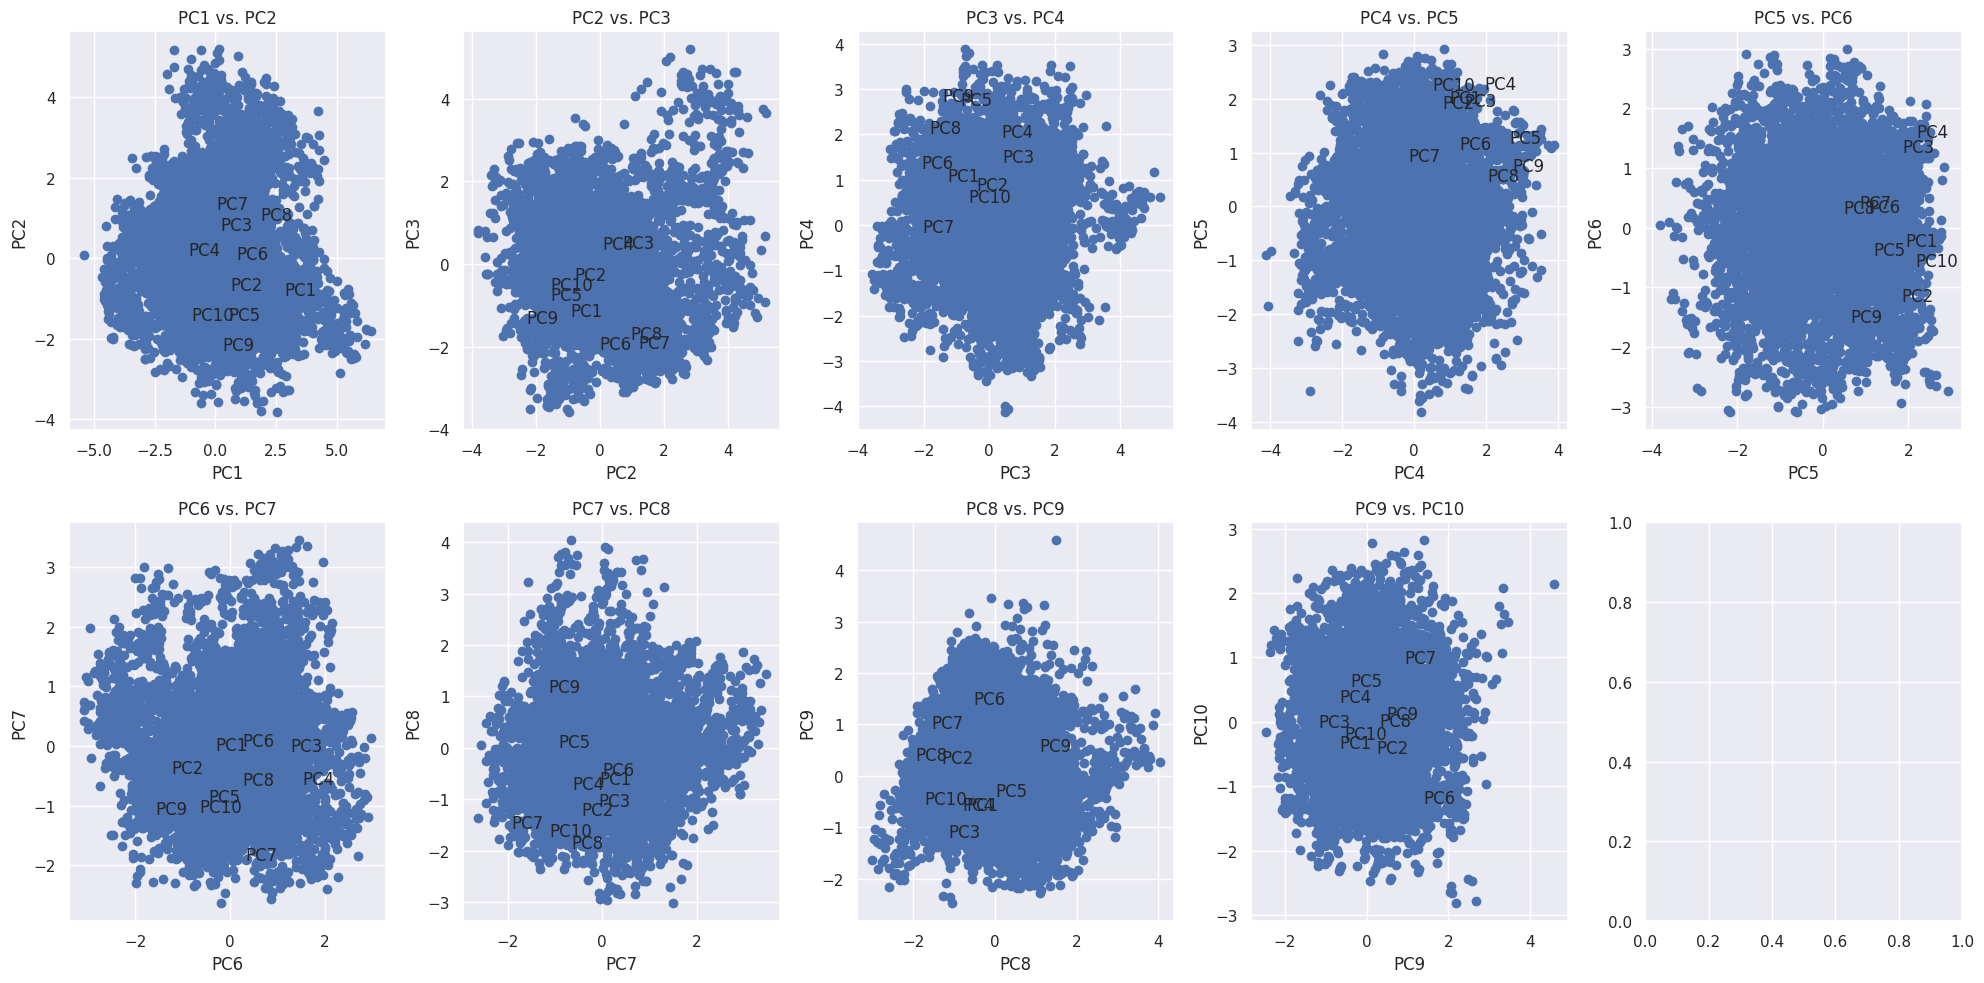

In [140]:
fig, axes = plt.subplots(2, 5, figsize=(20, 10))

for i in range(2):
    for j in range(5):
        pc_num = i * 5 + j + 1
        if pc_num <= 9:
            ax = axes[i, j]
            ax.scatter(pcs_df_2[f'PC{pc_num}'], pcs_df_2[f'PC{pc_num + 1}'])
            ax.set_xlabel(f'PC{pc_num}')
            ax.set_ylabel(f'PC{pc_num + 1}')
            for k, txt in enumerate(pcs_df_2.columns):
                ax.annotate(txt, (pcs_df_2[f'PC{pc_num}'][k], pcs_df_2[f'PC{pc_num + 1}'][k]))
            ax.set_title(f'PC{pc_num} vs. PC{pc_num + 1}')

plt.tight_layout()
plt.show()

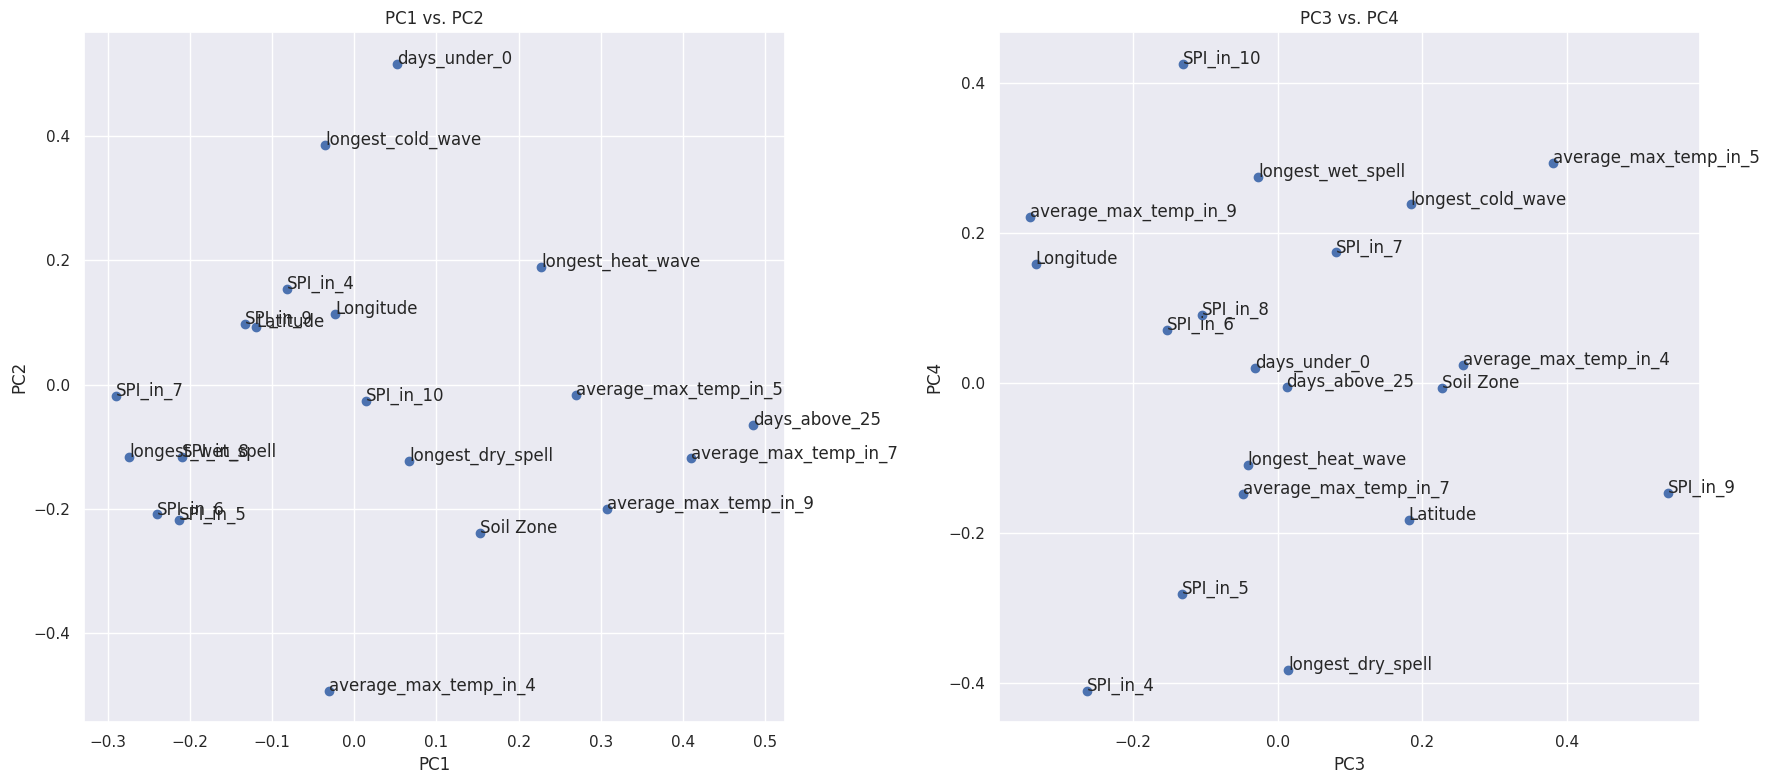

In [153]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 8))

# PC 1 vs. 2
ax1.scatter(pcs_df_2b.PC1, pcs_df_2b.PC2)
ax1.set_xlabel('PC1')
ax1.set_ylabel('PC2')
for i, txt in enumerate(pcs_df_2b.Feature):
    ax1.annotate(txt, (pcs_df_2b.PC1[i], pcs_df_2b.PC2[i]))
ax1.set_title('PC1 vs. PC2')

# PC 3 vs. 4
ax2.scatter(pcs_df_2b.PC3, pcs_df_2b.PC4)
ax2.set_xlabel('PC3')
ax2.set_ylabel('PC4')
for i, txt in enumerate(pcs_df_2b.Feature):
    ax2.annotate(txt, (pcs_df_2b.PC3[i], pcs_df_2b.PC4[i]))
ax2.set_title('PC3 vs. PC4')

plt.tight_layout()
plt.show()

### K-Means Clustering

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:8

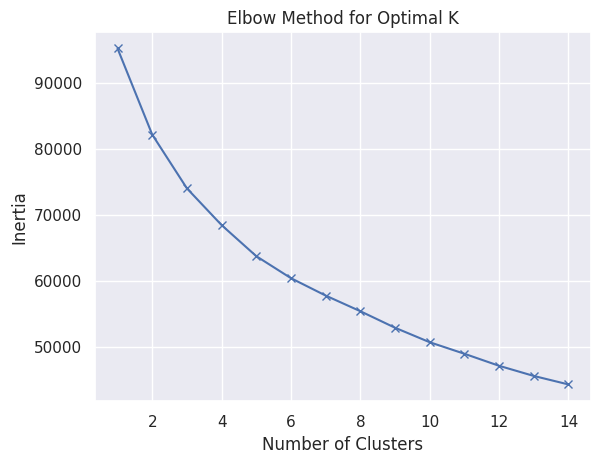

In [141]:
X_pcs = pcs_df_2[['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10']]

n_clusters = 15
cost = []

for i in range(1, n_clusters):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(X_pcs)
    cost.append(kmeans.inertia_)

# Plot the cost (inertia) against the number of clusters
plt.plot(range(1, n_clusters), cost, 'bx-')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.show()

# 6?

In [142]:
cluster_model_pc = KMeans(n_clusters = 6, max_iter=50,random_state = 50)
cluster_model_pc.fit(pcs_df_2)

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(max_iter=50, n_clusters=6, random_state=50)

In [145]:
aid_df = pcs_df_2
aid_df.index = pd.RangeIndex(len(pcs_df_2.index))

aid_df2 = pd.concat([pcs_df_2, pd.Series(cluster_model_pc.labels_)], axis=1)
aid_df2.columns = ['PC1', 'PC2','PC3','PC4','PC5','PC6', 'PC7','PC8','PC9','PC10','Cluster_ID']
aid_df2

print(aid_df2['Cluster_ID'].value_counts())

Cluster_ID
4    1498
5    1358
0    1044
3    1024
2     544
1     504
Name: count, dtype: int64


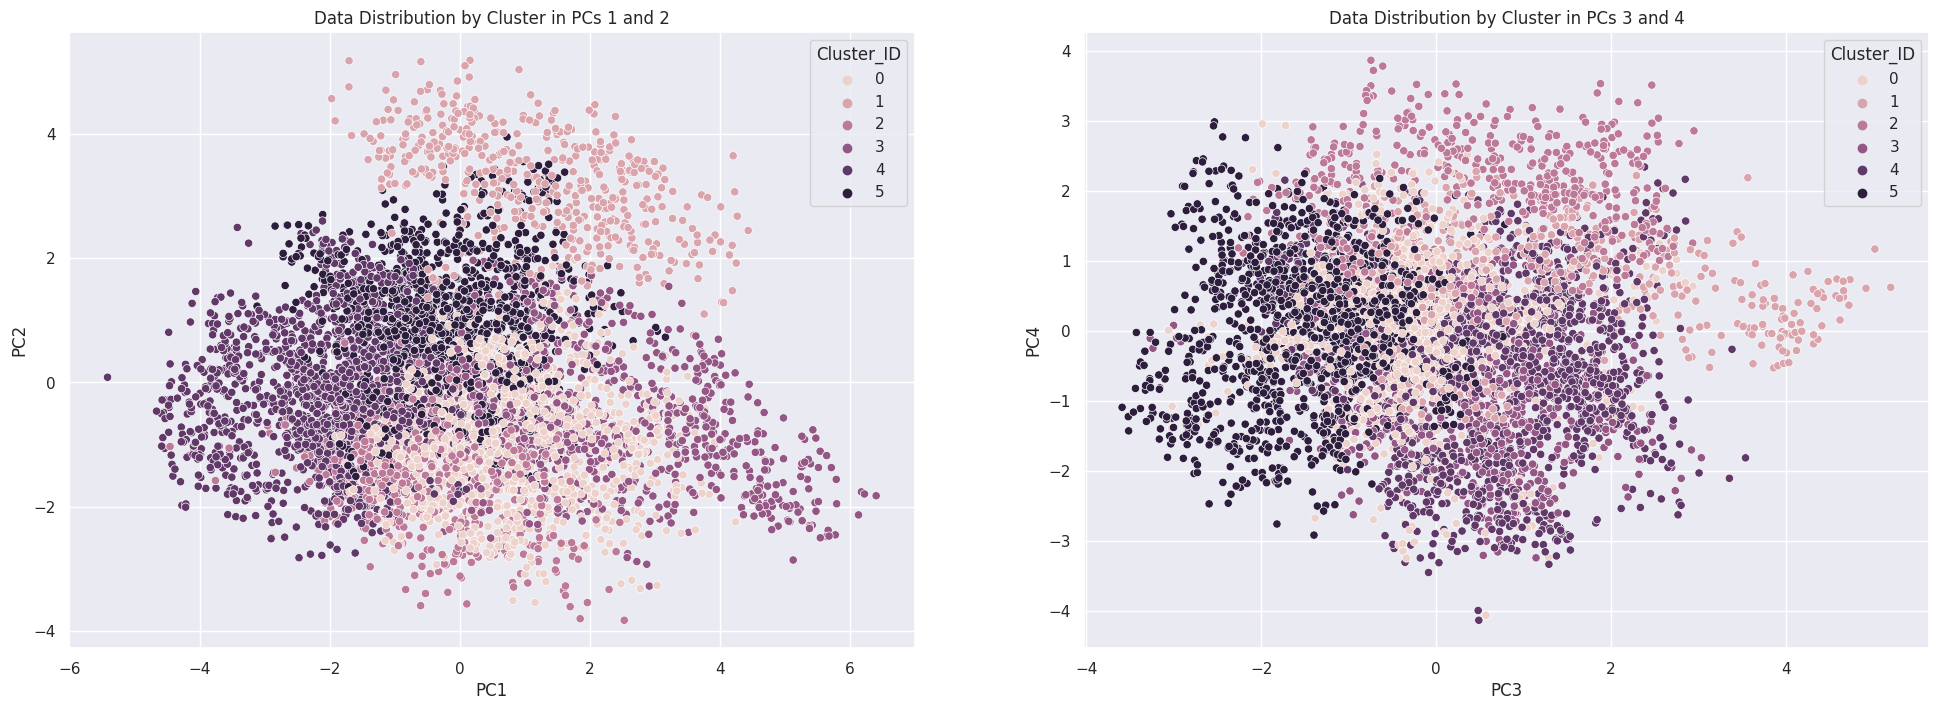

In [147]:
fig, axes = plt.subplots(1, 2, figsize=(24, 8))

sns.scatterplot(x='PC1', y='PC2', hue='Cluster_ID', legend='full', data=aid_df2, ax=axes[0])
axes[0].set_title('Data Distribution by Cluster in PCs 1 and 2')

sns.scatterplot(x='PC3', y='PC4', hue='Cluster_ID', legend='full', data=aid_df2, ax=axes[1])
axes[1].set_title('Data Distribution by Cluster in PCs 3 and 4')

plt.show()

### Modelling

In [158]:
X = pcs_df_2[['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10']]
y = canola_subsubset['Canola']

In [162]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5972 entries, 0 to 5971
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   PC1     5972 non-null   float64
 1   PC2     5972 non-null   float64
 2   PC3     5972 non-null   float64
 3   PC4     5972 non-null   float64
 4   PC5     5972 non-null   float64
 5   PC6     5972 non-null   float64
 6   PC7     5972 non-null   float64
 7   PC8     5972 non-null   float64
 8   PC9     5972 non-null   float64
 9   PC10    5972 non-null   float64
dtypes: float64(10)
memory usage: 466.7 KB


In [159]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

alphas = [0.1, 5.0, 10.0]  # Example values, you can define a range
ridge_cv = RidgeCV(alphas=alphas, store_cv_values=True)
ridge_cv.fit(X_train, y_train)

best_alpha = ridge_cv.alpha_
print(best_alpha)

classifiers = [
    LinearRegression(),
    Ridge(alpha=best_alpha),  # Adjust alpha as needed for Ridge regularization
    Lasso(alpha=1.0),  # Adjust alpha as needed for LASSO regularization
    ElasticNet(alpha=1.0, l1_ratio=0.5),  # Adjust alpha and l1_ratio as needed for ElasticNet
    svm.SVR(),
    linear_model.SGDRegressor(),
    linear_model.BayesianRidge(),
    linear_model.LassoLars(),
    linear_model.ARDRegression(),
    linear_model.PassiveAggressiveRegressor(),
    linear_model.TheilSenRegressor()
]

for clf in classifiers:
    print(clf)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)

    # Calculate evaluation metrics
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Print metrics
    print(f"Mean Squared Error: {mse:.2f}")
    print(f"R-squared: {r2:.2f}\n")

10.0
LinearRegression()
Mean Squared Error: 30.44
R-squared: 0.23

Ridge(alpha=10.0)
Mean Squared Error: 30.44
R-squared: 0.23

Lasso()
Mean Squared Error: 33.55
R-squared: 0.15

ElasticNet()
Mean Squared Error: 32.31
R-squared: 0.18

SVR()
Mean Squared Error: 14.65
R-squared: 0.63

SGDRegressor()
Mean Squared Error: 30.61
R-squared: 0.23

BayesianRidge()
Mean Squared Error: 30.44
R-squared: 0.23

LassoLars()
Mean Squared Error: 33.55
R-squared: 0.15

ARDRegression()
Mean Squared Error: 30.50
R-squared: 0.23

PassiveAggressiveRegressor()
Mean Squared Error: 72.39
R-squared: -0.83

TheilSenRegressor()
Mean Squared Error: 31.54
R-squared: 0.20



In [164]:
lasso_model = Lasso(alpha=0.1)
lasso_model.fit(X_train, y_train)

lasso_coefs = lasso_model.coef_

y_pred_lasso = lasso_model.predict(X_test)

mse_lasso = mean_squared_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)

# Print metrics
print(f"LASSO - Mean Squared Error: {mse_lasso:.2f}")
print(f"LASSO - R-squared: {r2_lasso:.2f}")

LASSO - Mean Squared Error: 30.54
LASSO - R-squared: 0.23


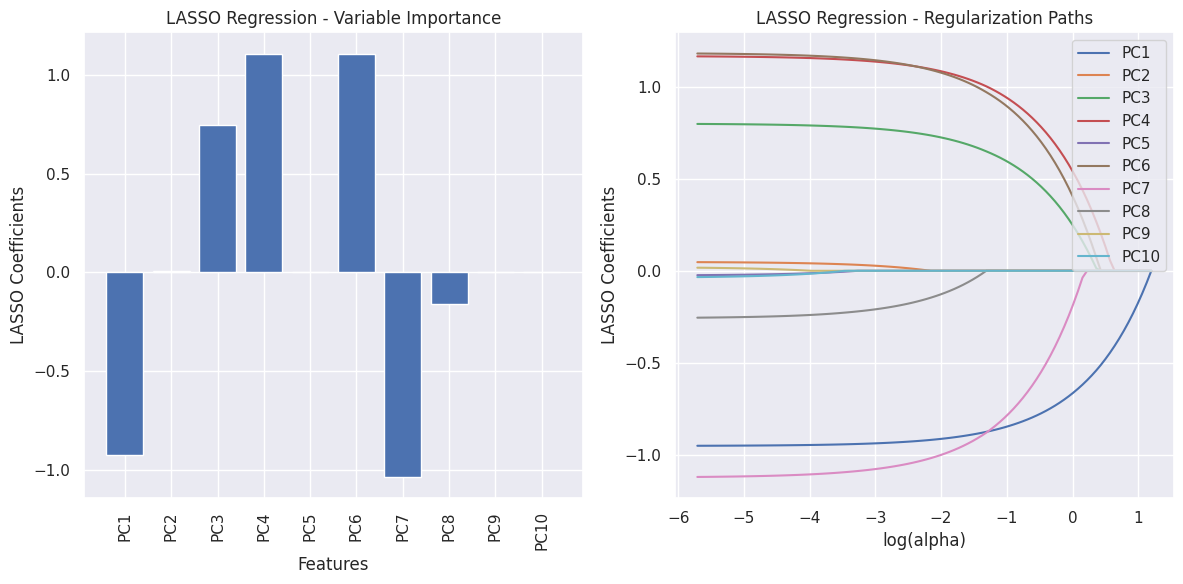

In [165]:
# Variable Importance
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.bar(range(len(lasso_coefs)), lasso_coefs)
plt.xticks(range(len(X.columns)), X.columns, rotation=90)
plt.xlabel('Features')
plt.ylabel('LASSO Coefficients')
plt.title('LASSO Regression - Variable Importance')

# Regularization Paths
plt.subplot(1, 2, 2)
alphas, coefs_lasso, _ = LassoCV(alphas=np.logspace(-6, 8, 13)).path(X_train, y_train)
lines = plt.plot(np.log(alphas), coefs_lasso.T)
plt.xlabel('log(alpha)')
plt.ylabel('LASSO Coefficients')
plt.title('LASSO Regression - Regularization Paths')
plt.legend(lines, X.columns, loc='upper right')

plt.tight_layout()
plt.show()

In [167]:
svm_regressor = SVR(kernel='rbf', C=1.0, gamma='scale')
svm_regressor.fit(X_train, y_train)
y_pred = svm_regressor.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared: {r2:.2f}")

Mean Squared Error: 14.65
R-squared: 0.63


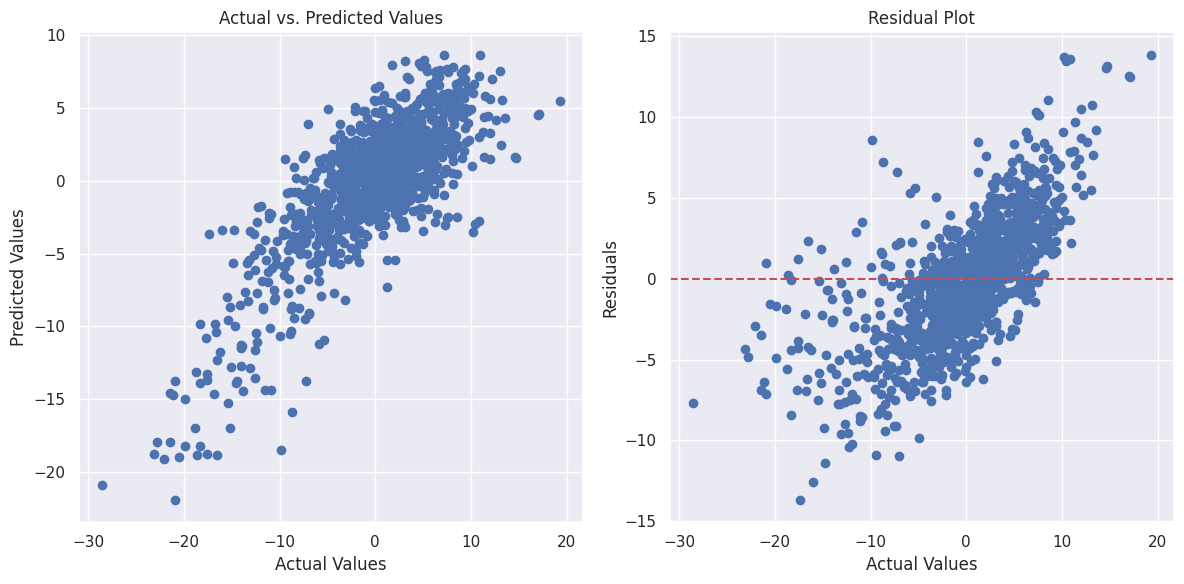

In [168]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')

plt.subplot(1, 2, 2)
residuals = y_test - y_pred
plt.scatter(y_test, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Actual Values')
plt.ylabel('Residuals')
plt.title('Residual Plot') # strong signs of non-linearity in data

plt.tight_layout()
plt.show()

In [169]:
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor.fit(X_train, y_train)

# Make predictions
y_pred = rf_regressor.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print metrics
print(f"Random Forest - Mean Squared Error: {mse:.2f}")
print(f"Random Forest - R-squared: {r2:.2f}")

Random Forest - Mean Squared Error: 11.74
Random Forest - R-squared: 0.70


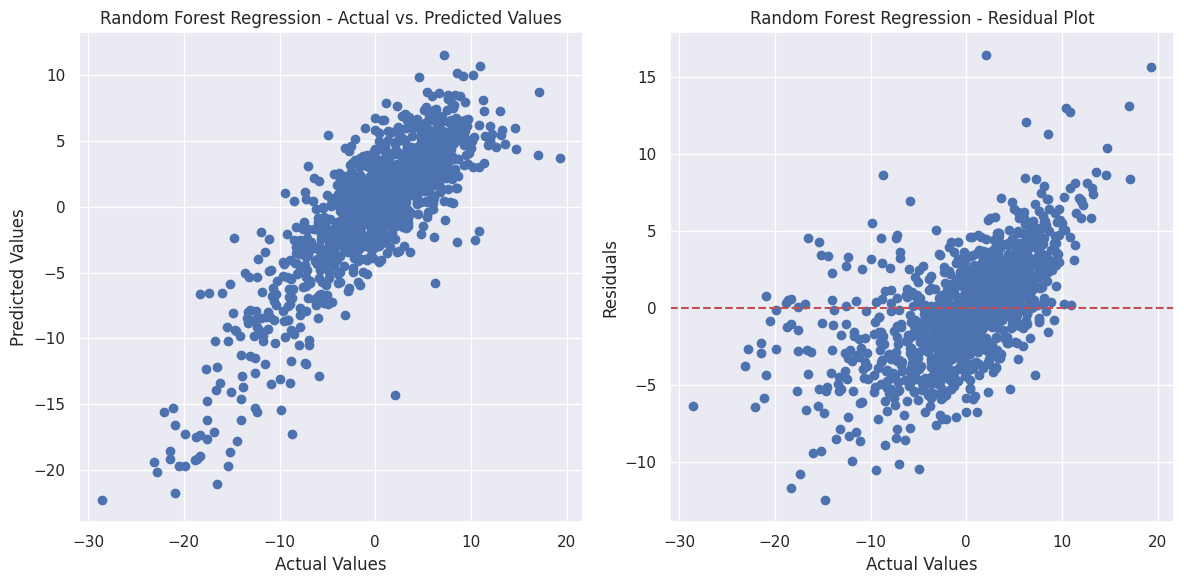

In [170]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Random Forest Regression - Actual vs. Predicted Values')

plt.subplot(1, 2, 2)
residuals_rf = y_test - y_pred
plt.scatter(y_test, residuals_rf)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Actual Values')
plt.ylabel('Residuals')
plt.title('Random Forest Regression - Residual Plot')

plt.tight_layout()
plt.show()

In [175]:
# TODO: LSTM

X_lstm = X.values.reshape((X.shape[0], 1, X.shape[1]))

model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(1, X_train.shape[1])))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

# Make predictions using the trained LSTM model
y_pred_lstm = model.predict(X_lstm).flatten()

# Evaluate the performance on the new data
mse_lstm = mean_squared_error(y, y_pred_lstm)
r2_lstm = r2_score(y, y_pred_lstm)

print(f"LSTM on New Data - Mean Squared Error: {mse_lstm:.2f}")
print(f"LSTM on New Data - R-squared: {r2_lstm:.2f}")

187/187 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
LSTM on New Data - Mean Squared Error: 40.09
LSTM on New Data - R-squared: 0.00


## Backlog

In [ ]:
plt.figure(figsize=(15, 6))
sns.countplot(x='longest_dry_spell', data=canola_features, palette='viridis')
plt.xlabel('Longest Dry Spell (Days)')
plt.ylabel('Frequency')
plt.title('Frequency Chart for Longest Dry Spells Over the Years')
plt.show()

In [96]:
# RNN Implementation

X = canola_subsubset.drop(['Canola'], axis=1)
y = canola_subsubset['Canola']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#Initialize RNN:
regressor = Sequential()

#Adding the first RNN layer and some Dropout regularization
regressor.add(SimpleRNN(units = 50, activation='tanh', return_sequences=True, input_shape= (X_train.shape[1],1)))
regressor.add(Dropout(0.2))

# Adding the second RNN layer and some Dropout regularization
regressor.add(SimpleRNN(units = 50, activation='tanh', return_sequences=True))
regressor.add(Dropout(0.2))

#Adding the third RNN layer and some Dropout regularization
regressor.add(SimpleRNN(units = 50, activation='tanh', return_sequences=True))
regressor.add(Dropout(0.2))

#Adding the fourth RNN layer and some Dropout regularization
regressor.add(SimpleRNN(units = 50))
regressor.add(Dropout(0.2))

#Adding the output layer
regressor.add(Dense(units = 1))

#Compile the RNN
regressor.compile(optimizer='adam', loss='mean_squared_error')

#Fitting the RNN to the Training set
# regressor.fit(X_train, y_train, epochs=100, batch_size=32)

Epoch 1/100


/opt/conda/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:205: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


150/150 ━━━━━━━━━━━━━━━━━━━━ 18s 54ms/step - loss: 40.3464
Epoch 2/100
150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 31.7617
Epoch 3/100
150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 28.7133
Epoch 4/100
150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 25.4986
Epoch 5/100
150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 24.6427
Epoch 6/100
150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 23.8532
Epoch 7/100
150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 23.7166
Epoch 8/100
150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 23.0197
Epoch 9/100
150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 21.5177
Epoch 10/100
150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 20.9923
Epoch 11/100
150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 21.4441
Epoch 12/100
150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 19.6105
Epoch 13/100
150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 20.4089
Epoch 14/100
150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 19.9484
Epoch 15/100
150/150 ━━━━━━━━━━━━━━━━━━

In [ ]:
# Make predictions on the test set
y_pred = regressor.predict(X_test_scaled)

In [ ]:
# Evaluate performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print metrics
print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared: {r2:.2f}")

In [ ]:
# Visualize predictions
plt.figure(figsize=(10, 6))
plt.plot(y_test, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.title('Canola Yield Prediction with SimpleRNN')
plt.xlabel('Data Points')
plt.ylabel('Canola Yield')
plt.legend()
plt.show()

In [ ]:
# Spatial Interpolation

from scipy.interpolate import Rbf
from scipy.interpolate import griddata

# Assuming X, Y, and Z are your longitude, latitude, and variable values
X = canola_full['Longitude'].values
Y = canola_full['Latitude'].values
Z = canola_full['Canola'].values

# Use Rbf for interpolation
# rbf = Rbf(X, Y, Z, function='linear')

# Specify the grid for interpolation
grid_X, grid_Y = np.meshgrid(np.linspace(X.min(), X.max(), num=100),
                             np.linspace(Y.min(), Y.max(), num=100))

# Perform interpolation
grid_Z = griddata((X, Y), Z, (grid_X, grid_Y), method='linear')

# Visualize the interpolated surface
plt.contourf(grid_X, grid_Y, grid_Z, cmap='viridis')
plt.scatter(X, Y, c=Z, cmap='viridis', edgecolor='k', s=20)
plt.colorbar(label='Canola Yield')
plt.title('Spatial Interpolation using Radial Basis Functions (RBF)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()